# <span style="color:Midnightblue">**1. Project Description**</span>

- 팀명 : KJB1
- 팀원 : 김은민

## <span style="color:Midnightblue">**1-1. Goal**</span>

 -  목표 : 카드 고객 이탈에 대해 분석하고 예측하는 모델을 개발함으로써 이탈 예측 및 방지에 기여

## <span style="color:Midnightblue">**1-2. Index**</span>

- Options (import package and read data)

- EDA 

- Preprocessing & Feature Engineering

- Modeling & Evaluate

# <span style="color:Midnightblue">**2. Options**</span>

## <span style="color:Midnightblue">**2-1. Package**</span>

In [1]:
# 데이터 전처리용도
import pandas as pd
import polars as pl
import numpy as np
# 데이터 시각화용도
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
# 모델링용도
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import lightgbm as lgb
from lightgbm import LGBMClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier, BaggingClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import eli5
from eli5.sklearn import PermutationImportance
# 결측치처리
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import KNNImputer, SimpleImputer, IterativeImputer
# 전처리
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# 오버샘플링
import imblearn
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
# 기타
import os
import platform
import warnings
from collections import Counter  
from math import ceil
from scipy import stats
from scipy.stats import chisquare, chi2_contingency, chi2

ValueError: Mismatched version between the Python package and the native shared object.  Python package version: 1.7.6. Shared object version: 1.7.3. Shared object is loaded from: /opt/conda/envs/python3.9/lib/libxgboost.so.
Likely cause:
  * XGBoost is first installed with anaconda then upgraded with pip. To fix it please remove one of the installations.

In [2]:
print('python         {}'.format(platform.python_version()))
print('pandas         {}'.format(pd.__version__))
print('numpy          {}'.format(np.__version__))
print('polars         {}'.format(pl.__version__))
print('matplotlib     {}'.format(matplotlib.__version__))
print('seaborn        {}'.format(sns.__version__))
print('sklearn        {}'.format(sklearn.__version__))  
print('eli5           {}'.format(eli5.__version__)) 
print('lightgbm       {}'.format(lgb.__version__))
print('xgboost        {}'.format(xgb.__version__))
print('imblearn       {}'.format(imblearn.__version__))

python         3.8.3
pandas         1.3.0
numpy          1.23.5
polars         0.17.11
matplotlib     3.7.2
seaborn        0.10.1
sklearn        1.2.2
eli5           0.13.0
lightgbm       3.3.1
xgboost        1.7.1
imblearn       0.11.0


In [3]:
warnings.filterwarnings("ignore")    
pl.Config.set_fmt_str_lengths(n=200) # 컬럼 숨김없이 보이게 처리

polars.config.Config

## <span style="color:Midnightblue">**2-2. Data Set**</span>

In [4]:
#Path     = './data/'
#df = pl.from_pandas(pd.read_csv(Path + "bank_churner.csv"))
df = pl.from_pandas(pd.read_csv("bank_churner.csv"))
df.shape

(8101, 21)

In [6]:
df.head(1)

cstno,is_churned,age,sex,dependent_num,education,marital_stat,imcome_cat,card_type,mon_on_book,tot_product_count,months_inact_for_12m,contact_cnt_for_12m,credit_line,tot_revol_balance,mean_open_to_buy,tot_amt_ratio_q4_q1,tot_trans_amt_for_12m,tot_trans_cnt_for_12m,tot_cnt_ratio_q4_q1,mean_util_pct
i64,i64,i64,str,i64,str,str,str,str,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64,f64,f64
708082083,0,45,"""F""",3,"""High School""","""Married""","""Less than $40K""","""Blue""",36,4,3,3,3544.0,null,1883.0,0.831,null,111.0,0.734,0.469


# <span style="color:Midnightblue">**3. Exploratory Data Analysis**</span>

## <span style="color:Midnightblue">**3-1. Distribution of the Target Column (is_churned)**</span>

In [7]:
df.groupby("is_churned").count() # 1 (이탈)

is_churned,count
i64,u32
0,6801
1,1300


<span style='background-color:steelblue'><font color='white'>&rightarrow; imbalanced data (이탈율 16%)</font></span>

## <span style="color:Midnightblue">**3-2. Basic Statistics**</span>

In [8]:
df.drop(['cstno','is_churned']).describe()

describe,age,sex,dependent_num,education,marital_stat,imcome_cat,card_type,mon_on_book,tot_product_count,months_inact_for_12m,contact_cnt_for_12m,credit_line,tot_revol_balance,mean_open_to_buy,tot_amt_ratio_q4_q1,tot_trans_amt_for_12m,tot_trans_cnt_for_12m,tot_cnt_ratio_q4_q1,mean_util_pct
str,f64,str,f64,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",8101.0,"""8101""",8101.0,"""8101""","""8101""","""8101""","""8101""",8101.0,8101.0,8101.0,8101.0,8101.0,8101.0,8101.0,8101.0,8101.0,8101.0,8101.0,8101.0
"""null_count""",0.0,"""808""",0.0,"""0""","""0""","""1619""","""0""",0.0,0.0,0.0,0.0,0.0,1521.0,0.0,2435.0,1669.0,3250.0,1629.0,2526.0
"""mean""",46.306382,null,2.334773,null,null,null,null,35.92359,3.813233,2.346871,2.450315,8636.548068,1158.693313,7476.165276,0.761457,4438.785448,64.568336,0.709951,0.274055
"""std""",8.022527,null,1.289564,null,null,null,null,8.024359,1.551838,1.014177,1.100687,9086.419557,814.653118,9080.27991,0.217645,3451.913558,23.659213,0.234484,0.275833
"""min""",26.0,"""F""",0.0,"""College""","""Divorced""","""$120K +""","""Blue""",13.0,1.0,0.0,0.0,1438.3,0.0,3.0,0.0,510.0,11.0,0.0,0.0
"""max""",70.0,"""M""",5.0,"""Unknown""","""Unknown""","""Unknown""","""Silver""",56.0,6.0,6.0,6.0,34516.0,2517.0,34516.0,2.594,18484.0,139.0,3.571,0.999
"""median""",46.0,null,2.0,null,null,null,null,36.0,4.0,2.0,2.0,4549.0,1272.0,3495.0,0.739,3905.0,67.0,0.7,0.175
"""25%""",41.0,null,1.0,null,null,null,null,31.0,3.0,2.0,2.0,2555.0,326.0,1341.0,0.631,2153.0,44.0,0.581,0.023
"""75%""",52.0,null,3.0,null,null,null,null,40.0,5.0,3.0,3.0,11128.0,1778.0,9942.0,0.862,4755.0,80.0,0.818,0.501


In [9]:
df.to_pandas().info() # data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8101 entries, 0 to 8100
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cstno                  8101 non-null   int64  
 1   is_churned             8101 non-null   int64  
 2   age                    8101 non-null   int64  
 3   sex                    7293 non-null   object 
 4   dependent_num          8101 non-null   int64  
 5   education              8101 non-null   object 
 6   marital_stat           8101 non-null   object 
 7   imcome_cat             6482 non-null   object 
 8   card_type              8101 non-null   object 
 9   mon_on_book            8101 non-null   int64  
 10  tot_product_count      8101 non-null   int64  
 11  months_inact_for_12m   8101 non-null   int64  
 12  contact_cnt_for_12m    8101 non-null   int64  
 13  credit_line            8101 non-null   float64
 14  tot_revol_balance      6580 non-null   float64
 15  mean

In [10]:
for col in df.select(pl.col(pl.Utf8)).columns:
    print(col, df[col].n_unique())

sex 3
education 7
marital_stat 4
imcome_cat 7
card_type 4


In [11]:
for col in df.select(pl.col(pl.Int64)).columns:
    print(col, df[col].n_unique())

cstno 8101
is_churned 2
age 44
dependent_num 6
mon_on_book 44
tot_product_count 6
months_inact_for_12m 7
contact_cnt_for_12m 7


## <span style="color:Midnightblue">**3-3. Missing Values**</span>

In [12]:
def nullCnt(df):
    nullCnt = (
        df.null_count()
          .melt(variable_name="col",value_name="count")
          .with_columns((pl.col("count")/len(df)*100).round(1).alias("%"))
          .sort("%",descending=True)
    )
    return nullCnt.filter(pl.col("count")>0)

In [13]:
nullCnt(df)

col,count,%
str,u32,f64
"""tot_trans_cnt_for_12m""",3250,40.1
"""mean_util_pct""",2526,31.2
"""tot_amt_ratio_q4_q1""",2435,30.1
"""tot_trans_amt_for_12m""",1669,20.6
"""tot_cnt_ratio_q4_q1""",1629,20.1
"""imcome_cat""",1619,20.0
"""tot_revol_balance""",1521,18.8
"""sex""",808,10.0


<span style='background-color:steelblue'><font color='white'>&rightarrow; 21개 컬럼 중, 8개 컬럼에 결측치 존재</span>

## <span style="color:Midnightblue">**3-4. Correlations**</span>

In [14]:
corr = df.drop("cstno").to_pandas().corr()

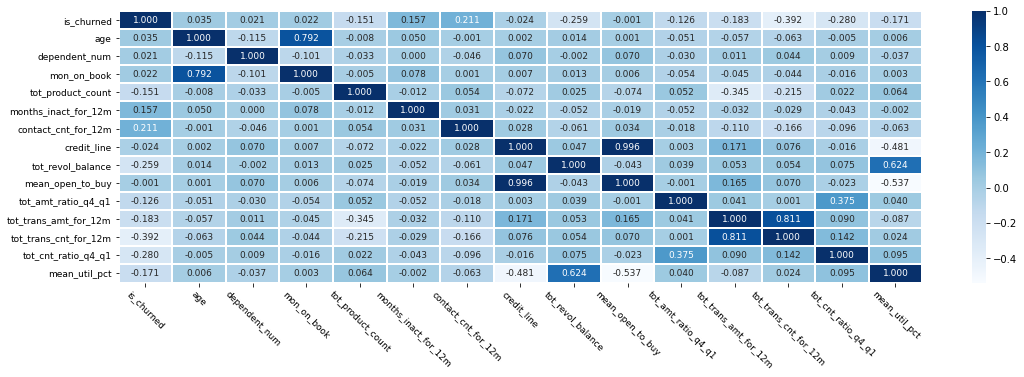

In [15]:
fig, ax1 = plt.subplots(figsize=(18,5))
sns.heatmap(corr,annot=True,ax=ax1,linewidths=0.1,fmt='.3f',cmap='Blues',annot_kws={"size": 9})
#plt.title("Correlations",size=15) 
plt.tick_params(labelsize=9)    
plt.xticks(rotation=-45)    
plt.show()

<span style='background-color:steelblue'><font color='white'>&rightarrow; Negative Correlation with "is_churned"</font></span> : tot_trans_cnt_for_12m(최근 12개월 동안의 거래 횟수), tot_cnt_ratio_q4_q1(1분기 대비 4분기의 거래 횟수 비율), tot_revol_balance(리볼빙잔액) 등 

거래횟수, 리볼빙 잔액이 줄어들수록 고객의 이탈가능성이 높아지는 관계가 있어보이지만, <U>상관관계가 매우 높진 않다</U>

<span style='background-color:steelblue'><font color='white'>&rightarrow; Positive  Correlation with "is_churned"</font></span> :contact_cnt_for_12m(최근 12개월 동안 연락 횟수), months_inact_for_12m(최근12개월간 카드거래가 없던 개월수) 등

연락횟수가 많고, 카드거래가 없는 기간이 긴 고객일수록 이탈가능성이 높아지는 관계가 있어보이지만, <U>상관관계가 매우 높진 않다</U>

&rightarrow; age(나이), depencent_num(부양가족수), mon_on_book(은행거래기간), credit_line(카드한도)등의 변수는 고객 이탈과 상관관계가 거의 없다. 변수 삭제에 대한 고민 필요

<span style='background-color:steelblue'><font color='white'>&rightarrow; Negative Correlation Between X</font></span> : mean_open_to_buy(평균 사용가능 신용한도) & mean_util_pct(평균한도소진율), credit_line(카드한도) & mean_util_pct(평균한도소진율) 끼리 음의 상관관계가 있다

<span style='background-color:steelblue'><font color='white'>&rightarrow; Positive Correlation Between X</font></span> :  <U>mean_open_to_buy(평균 사용가능 신용한도) & credit_line(카드한도), tot_trans_amt_for_12m(최근12개월 거래금액) & tot_trans_cnt_for_12m(최근12개월거래건수), </U>
    
<U>mon_on_book(은행거래기간) & age(나이)</U>, tot_revol_balance(리볼빙잔액)&  mean_util_pct(평균한도소진율)끼리 <U>상관관계가 크다</U>

<span style='background-color:steelblue'><font color='white'>&rightarrow; 다중공선성의 문제가 있을 수도 있다</font></span> <U><font color='red'>PCA 및 Feature Select 실시 예정, 뿐만 아니라 결측치 처리에도 활용 예정</font></U>

## <span style="color:Midnightblue">**3-5. Categorical Columns**</span>

In [16]:
def Graph0(df,col):
    cnt = df.pivot(index=col,columns='is_churned',values='cstno',aggregate_function='count').sort(col).fill_null(0)
    Exist = cnt.select(pl.col("0")).to_series().to_list()
    Churn = cnt.select(pl.col("1")).to_series().to_list() 
    xlabel = cnt.select(pl.col(col)).to_series().to_list()
    
    
    # multi Bar (count value)
    plt.bar(x=np.arange(len(xlabel))-0.2,height=Exist,width=0.5,label="Exist",color="darkgray")
    plt.bar(x=np.arange(len(xlabel))+0.2,height=Churn,width=0.5,label="Churn",color="steelblue")
    plt.xticks(np.arange(len(xlabel)),labels=xlabel,fontsize=10)
    plt.title(col,fontsize=15)
    plt.ylabel('Count',fontsize=10)

    #for i,j in enumerate(np.arange(len(xlabel))-0.2):
        #plt.text(x=j,y=Exist[i],s=Exist[i],ha='center',fontsize=9)
    for i,j in enumerate(np.arange(len(xlabel))+0.2):
        if Churn[i]>=500:plt.text(x=j,y=Churn[i]+50,s=Churn[i],ha='center',fontsize=11)
    ax1_patch = mpatches.Patch(label='Exist',linewidth = 0, color='darkgray')
    ax2_patch = mpatches.Patch(label='Chrun',linewidth = 0)
    plt.legend(handles=[ax1_patch, ax2_patch], frameon=False, fontsize = 11, loc='upper left')

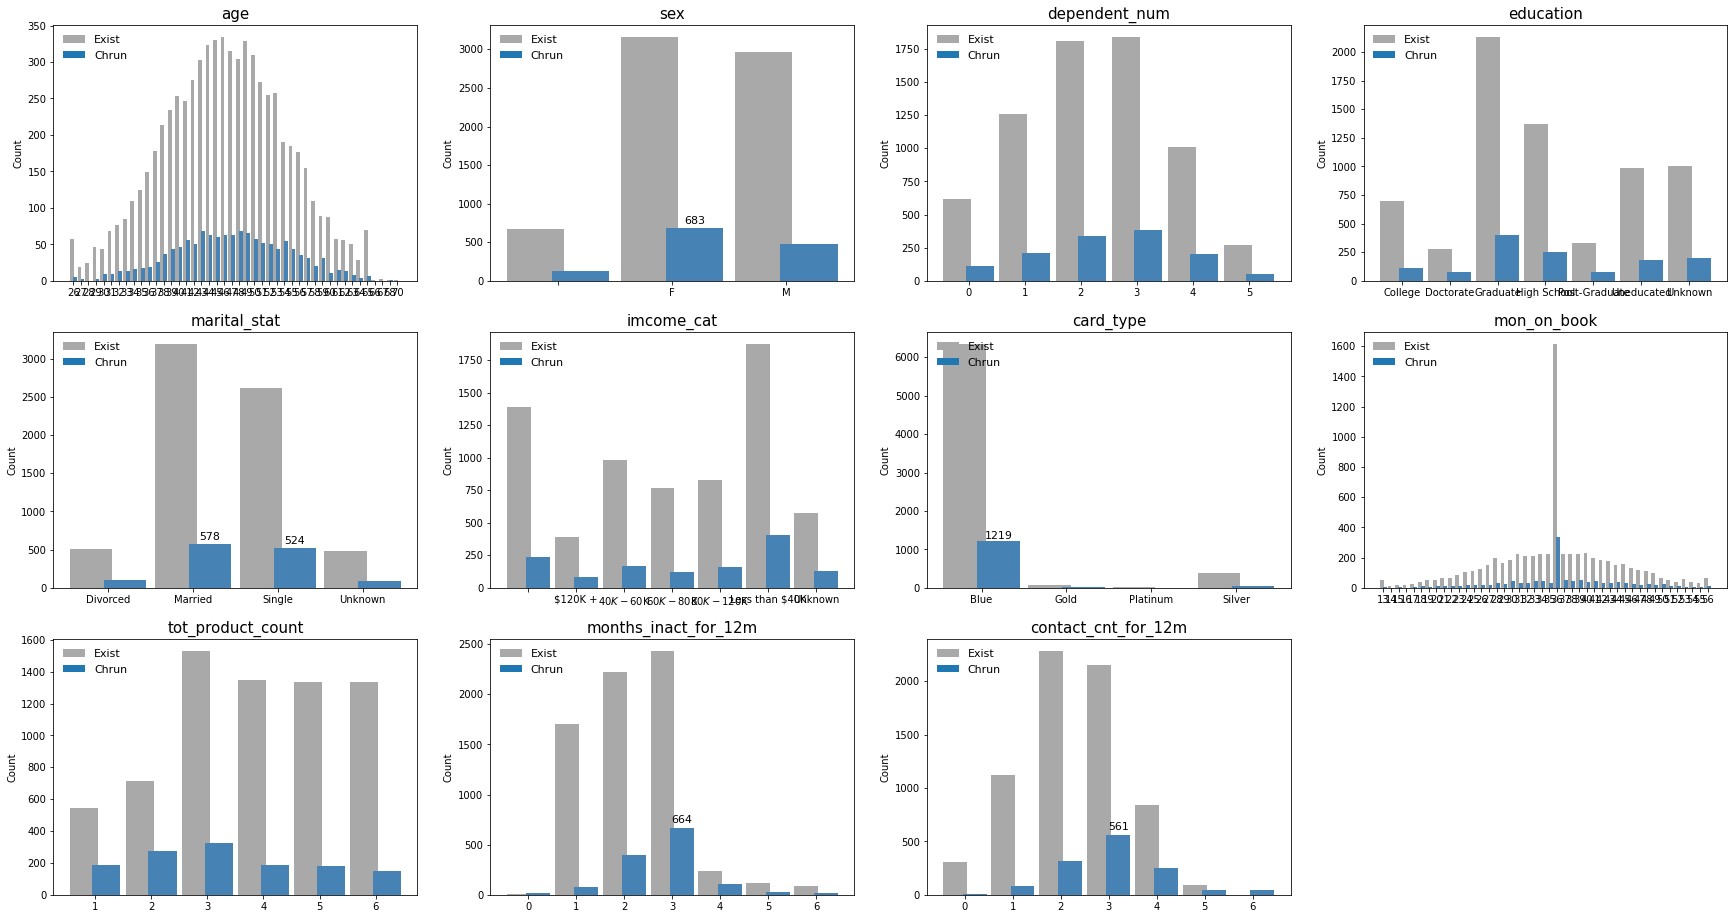

In [17]:
ColNames = df.select(pl.col(pl.Utf8,pl.Int64)).drop(["cstno","is_churned"]).columns  

cols  = 4  # 열
rows  = ceil(len(ColNames) / cols)  # 행

plt.subplots(figsize=(30,16))
for n, col in enumerate(ColNames):
    plt.subplot(rows, cols, n + 1)   # 위치 
    Graph0(df,col)

<span style='background-color:steelblue'><font color='white'> &rightarrow; 단순하게 이탈고객수로 비교했을때,</font></span> 여성고객일때, Married&Single 일때, 수입규모가 적을때, Blue 카드를 소지할때, 카드거래를 3개월동안 하지 않았을때, 연락횟수가 3번일때 이탈고객이 많다

In [18]:
def Graph1(df,col):
    tmp = (
        df.groupby(col).agg([pl.col("cstno").count().alias("totalCnt"),               # 해당 그룹 내 전체 인원수
                             pl.col("is_churned").sum().alias("churnCnt")])           # 해당 그룹 내 이탈 고객수
          .with_columns((pl.col("churnCnt")/pl.col("totalCnt")).alias("churnRate"))   # 이탈율 
          .sort(col)
    )
    
    # Bar (count value)
    x = np.arange(len(tmp))
    xlabel = tmp[col].to_list()
    
    bar = plt.bar(x=x,height=tmp["totalCnt"],width=0.5,color="darkgray",alpha=0.7, linewidth = 0)
    plt.xticks(x,labels=xlabel,fontsize=11)
    plt.yticks(fontsize=11)
    if len(xlabel)>=10: plt.locator_params(axis='x', nbins=len(xlabel)/2) # x축라벨 표시 조절
    #for rect in bar:
    #    plt.text(x=rect.get_x()+rect.get_width()/2,y=rect.get_height(),s=rect.get_height(),ha="center")
     
    # line (churn Rate)
    twinx = plt.twinx()  # 이중축 생성
    twinx.set_ylim(0,1)
    plot = twinx.plot(x,tmp["churnRate"].to_list(),color="steelblue")
    plt.yticks(fontsize=11)
    
    # 이탈율 최고점에 값 표기
    #maxV = tmp["churnRate"].max()
    #for i,j in enumerate(tmp["churnRate"]):
    #    if j == maxV: plt.text(x=i,y=j+0.03,s=f"{j:5.2}",ha='center',fontsize=11)      
    for i,j in enumerate(tmp["churnRate"]):
        if j>=0.5: plt.text(x=i,y=j+0.03,s=f"{j:5.2}",ha='center',fontsize=11.5)
   
    # 범례
    ax1_patch = mpatches.Patch(label='Count',linewidth =0,color='darkgray')
    ax2_patch = mpatches.Patch(label='Chrun Rate',linewidth = 0)
    plt.legend(handles=[ax1_patch, ax2_patch], frameon=False, fontsize = 11, loc='upper left')
    
    # 제목
    plt.title(col,fontsize=15)

    # 배경, 격자
    plt.grid(False)  # 격자 제거
    #sns.set()       # 배경 지정

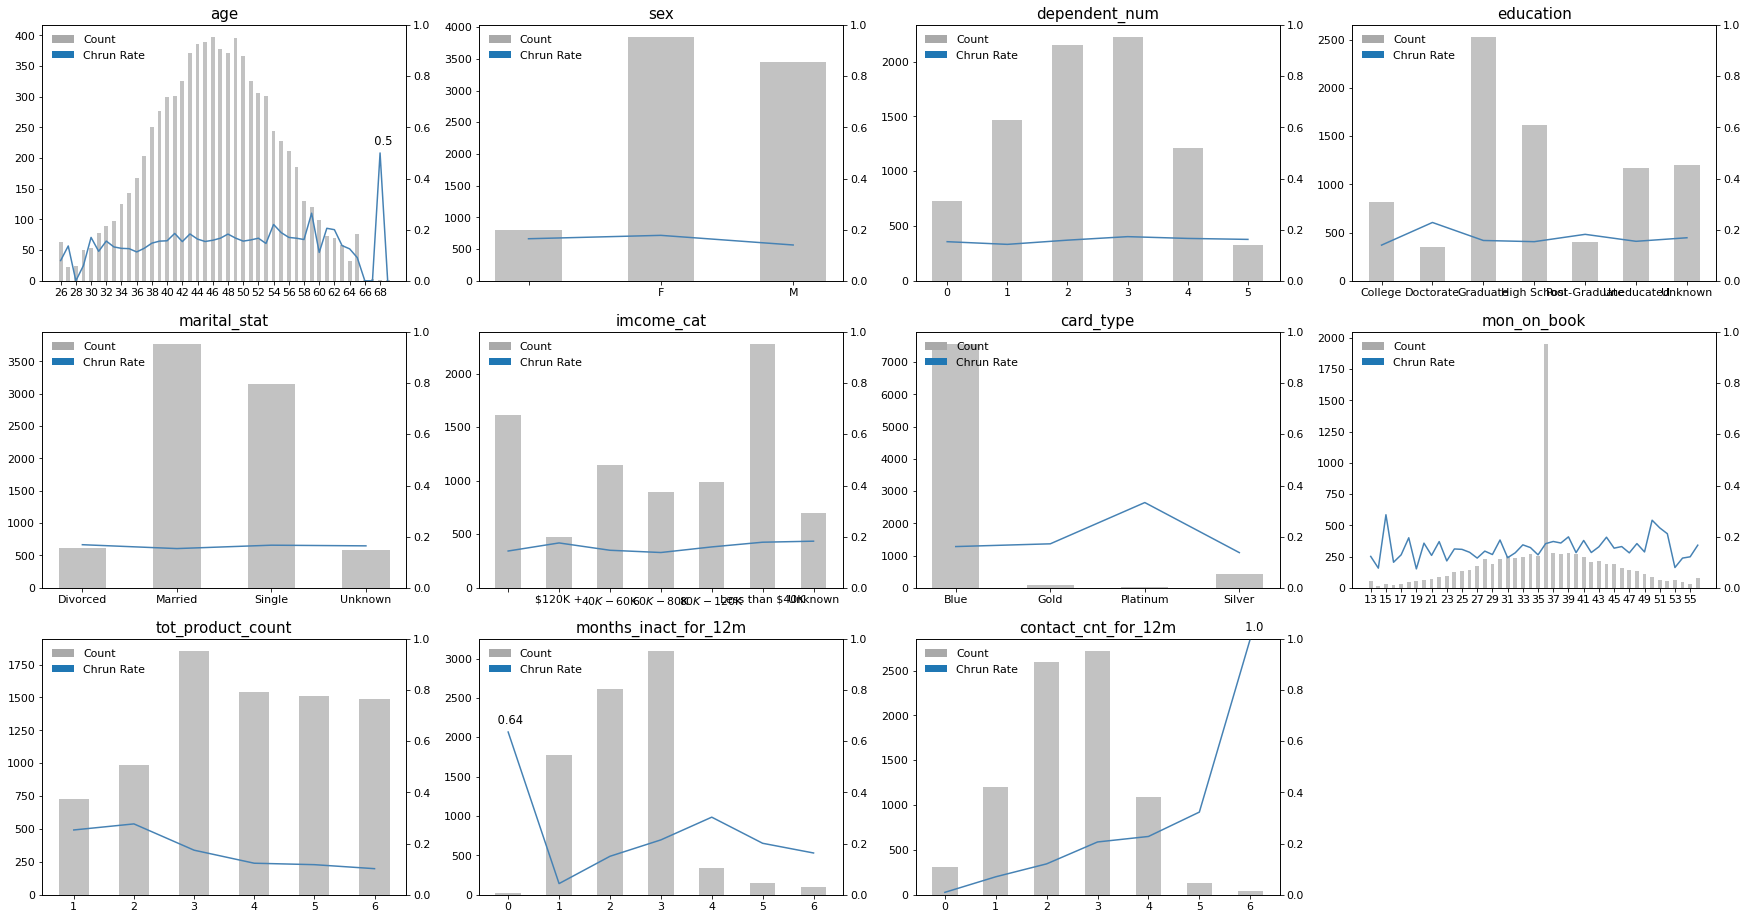

In [19]:
ColNames = df.select(pl.col(pl.Utf8,pl.Int64)).drop(["cstno","is_churned"]).columns  
cols  = 4  # 열
rows  = ceil(len(ColNames) / cols)  # 행

plt.subplots(figsize=(30,16))
for n, col in enumerate(ColNames):
    plt.subplot(rows, cols, n + 1)   # 위치 
    Graph1(df,col)

<span style='background-color:steelblue'><font color='white'> &rightarrow; 그룹간 이탈율로 비교했을때, </font></span>  sex(성별), dependent_num(부양가족수), marital_stat(결혼상태), imcome_cat(수입규모), education(교육수준) 변수는 <U>그룹간 이탈율 차이 크지 않다</U>. 유효한 변수처럼 보이지 않아서, 뒷단에서 <span style='background-color:steelblue'><font color='white'>카이제곱 검증 실시</font></span>

&rightarrow; tot_product_count(현재 보유 상품갯수) 4개 이상일때 이탈율의 차이가 거의 없다. (현재 보유 상품갯수가 많을수록 이탈율이 적은편이다. <U>전처리할때 하나의 그룹으로 묶어보는 작업 실시)</U>

## <span style="color:Midnightblue">**3-6. Continuous Columns**</span>

In [20]:
def Graph2_1(df,col,i,j):
    #KDE plot
    sns.distplot(df.filter(pl.col("is_churned")==0)[col], label="Exist", ax=ax[i,j], color='gray')  #hist=False 
    sns.distplot(df.filter(pl.col("is_churned")==1)[col], label="Churn", ax=ax[i,j])#, color="steelblue")
    
    # 범례 지정
    ax1_patch = mpatches.Patch(label='Exist',linewidth = 0, color='darkgray')
    ax2_patch = mpatches.Patch(label='Chrun',linewidth = 0)
    ax[i,j].legend(handles=[ax1_patch, ax2_patch], frameon=False, fontsize = 11, loc='upper left')
    
    # 축,제목 지정
    #ax[i,j].xaxis.set_visible(True)
    ax[i,j].set_xlabel(col,fontdict={'size':0}) # x축제목 안보이게 표현
    ax[i,j].set_title(col,fontsize=15)
    
    #print("churn :",t0[col].mean())
    #print("exist :",t1[col].mean())

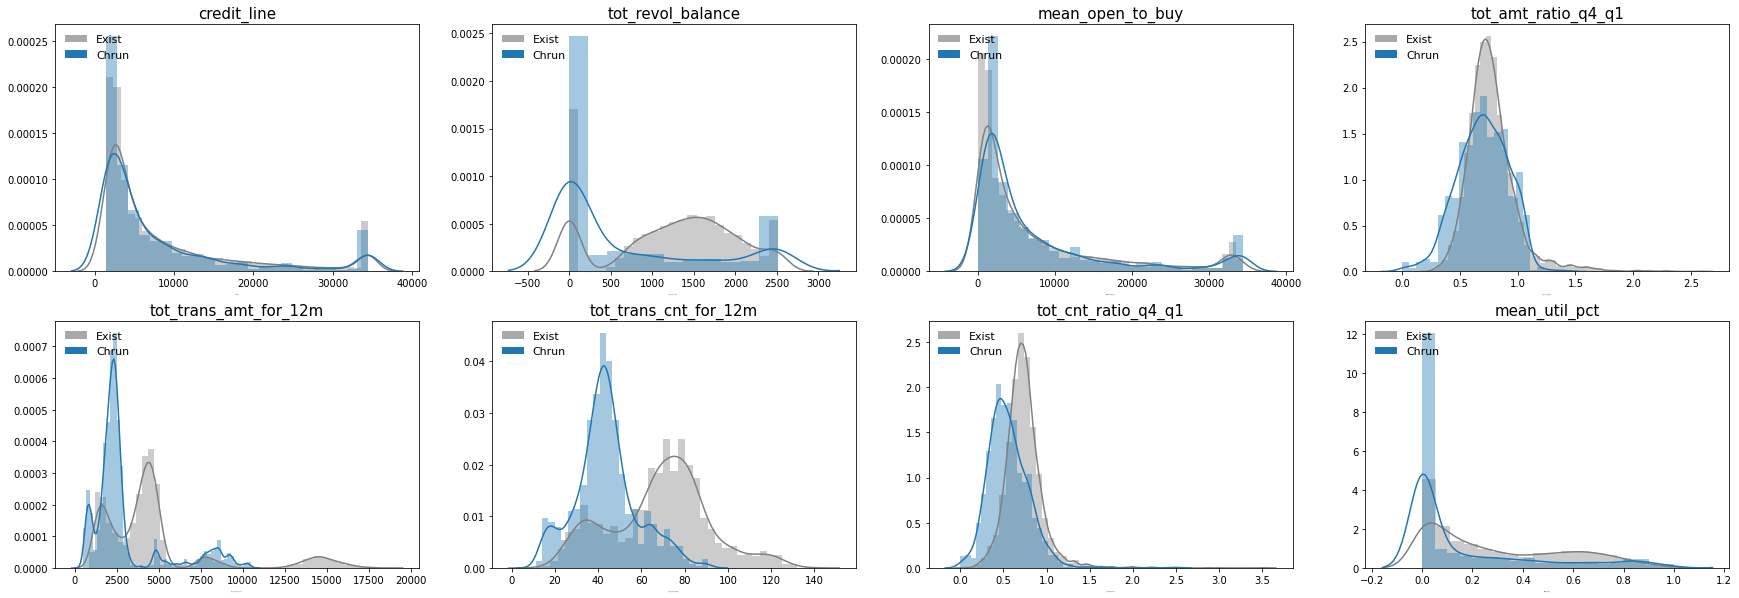

In [21]:
ColNames = df.select(pl.col(pl.Float64)).columns # 숫자형변수 (연속형)
cols  = 4  # 열

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(30,10))
for n, col in enumerate(ColNames):
    i = int(n/cols)  # row 위치
    j = int(n%cols)  # col 위치
    Graph2_1(df,col,i,j)

In [22]:
def Graph2_2(df,col,i,j):
    #Box plot
    Exist = df.filter(pl.col("is_churned")==0)[[col]].drop_nulls().to_numpy()
    Churn = df.filter(pl.col("is_churned")==1)[[col]].drop_nulls().to_numpy()
    
    box1 = ax[i,j].boxplot(Exist,labels=['Exist'],positions=range(0,1), patch_artist=True)
    box2 = ax[i,j].boxplot(Churn,labels=['Churn'],positions=range(1,2), patch_artist=True)
    
    for box in box1['boxes']:  # ax1그래프에 색깔바꾸기
        box.set_facecolor('darkgray')           
    # 축,제목 지정
    #ax[i,j].xaxis.set_visible(True)
    ax[i,j].set_xlabel(col,fontdict={'size':0}) # x축제목 안보이게 표현
    ax[i,j].set_title(col,fontsize=15)

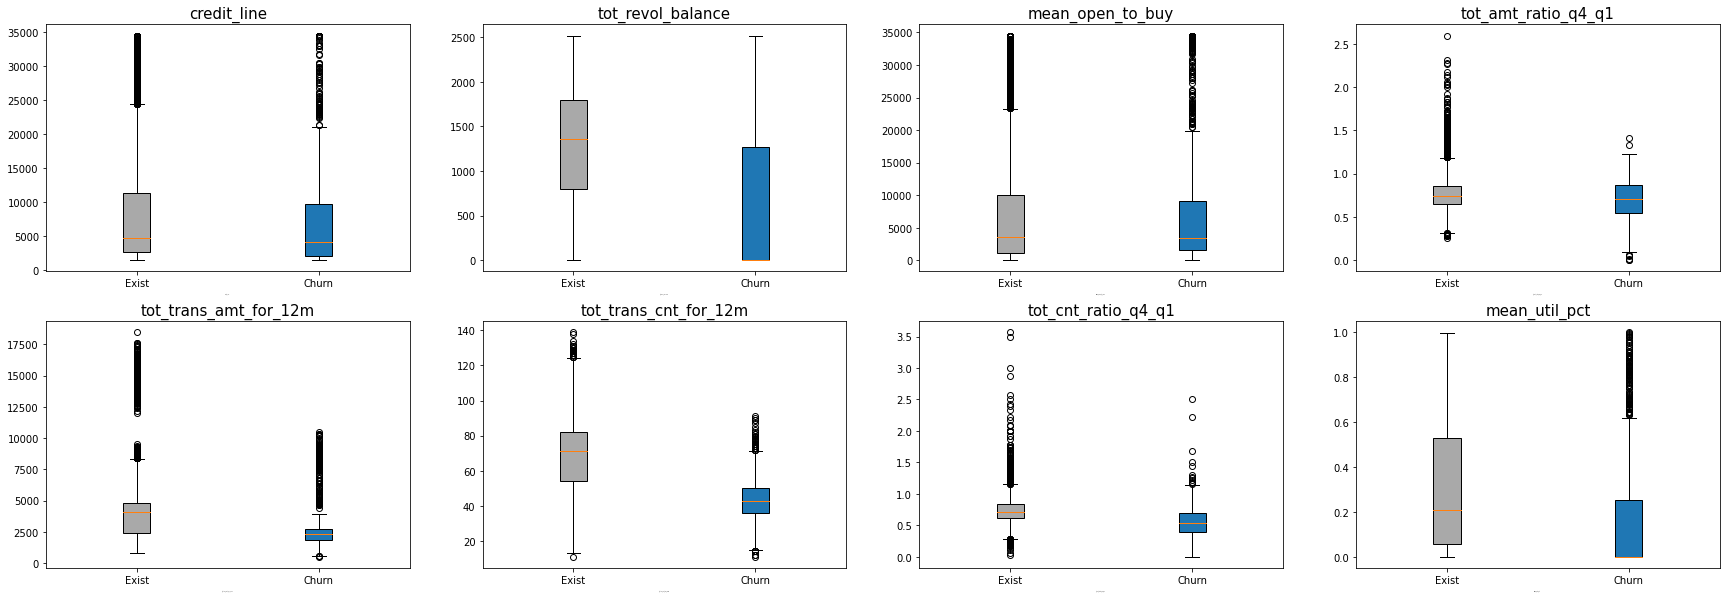

In [23]:
ColNames = df.select(pl.col(pl.Float64)).columns # 숫자형변수 (연속형)
cols  = 4  # 열

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(30,10))
for n, col in enumerate(ColNames):
    i = int(n/cols)  # row 위치
    j = int(n%cols)  # col 위치
    Graph2_2(df,col,i,j)

<span style='background-color:steelblue'><font color='white'> &rightarrow;  tot_revol_balance(리볼빙잔액), tot_trans_amt_for_12m(최근12개월거래금액), tot_trans_cnt_for_12m(최근12개월거래건수), tot_cnt_ratio_q4_q1(1분기대비 4분기의 거래 횟수 비율) 이탈고객과 유지고객의 특성이 다르다</font></span> (추가적으로 anova test 로 유의미한 차이가 있는지 확인) 

최근 12개월동안 거래횟수,금액이 적은 고객일수록, 1분기대비 거래횟수가 줄어들수록, 리볼빙 잔액이 적을수록, 이탈가능성이 높다

<span style='background-color:steelblue'><font color='white'> &rightarrow; 이상치가 존재한다 </font></span>

## <span style="color:Midnightblue">**3-7. Outlier (Interquartile Range)**</span>

In [24]:
def Graph3(df,col,i,j):
    # outlier detect
    q25, q75 = np.quantile(df[[col]].drop_nulls(),0.25), np.quantile(df[[col]].drop_nulls(),0.75)     # 1사분위수, 3사분위수
    IQR = q75-q25 # IQR
    minimum, maximum = q25-(IQR*1.5), q75+(IQR*1.5)
    # detect outlier
    outlier = df.filter((pl.col(col)>maximum)|(pl.col(col)<minimum))
    outlierp = round(len(outlier)/len(df)*100,2)
    
    # graph
    sns.distplot(df[col],kde=False,color="steelblue",ax=ax[i,j])
    ax[i,j].axvspan(xmin=max(0,minimum),xmax=df[col].min(),alpha=0.2,color="darkgray")
    ax[i,j].axvspan(xmin=maximum,xmax=df[col].max(),alpha=0.2,color="darkgray")
    ax[i,j].set_title(f"{col} ({outlierp}%)",fontsize=15)
    ax[i,j].set_xlabel(col,fontdict={'size':0})
    ax[i,j].set_xlim(df[col].min(),df[col].max())
    
    # 범례
    ax1_patch = mpatches.Patch(label='outlier Zone',linewidth = 0, color='darkgray')
    ax[i,j].legend(handles=[ax1_patch], frameon=False, fontsize = 11, loc='upper right')

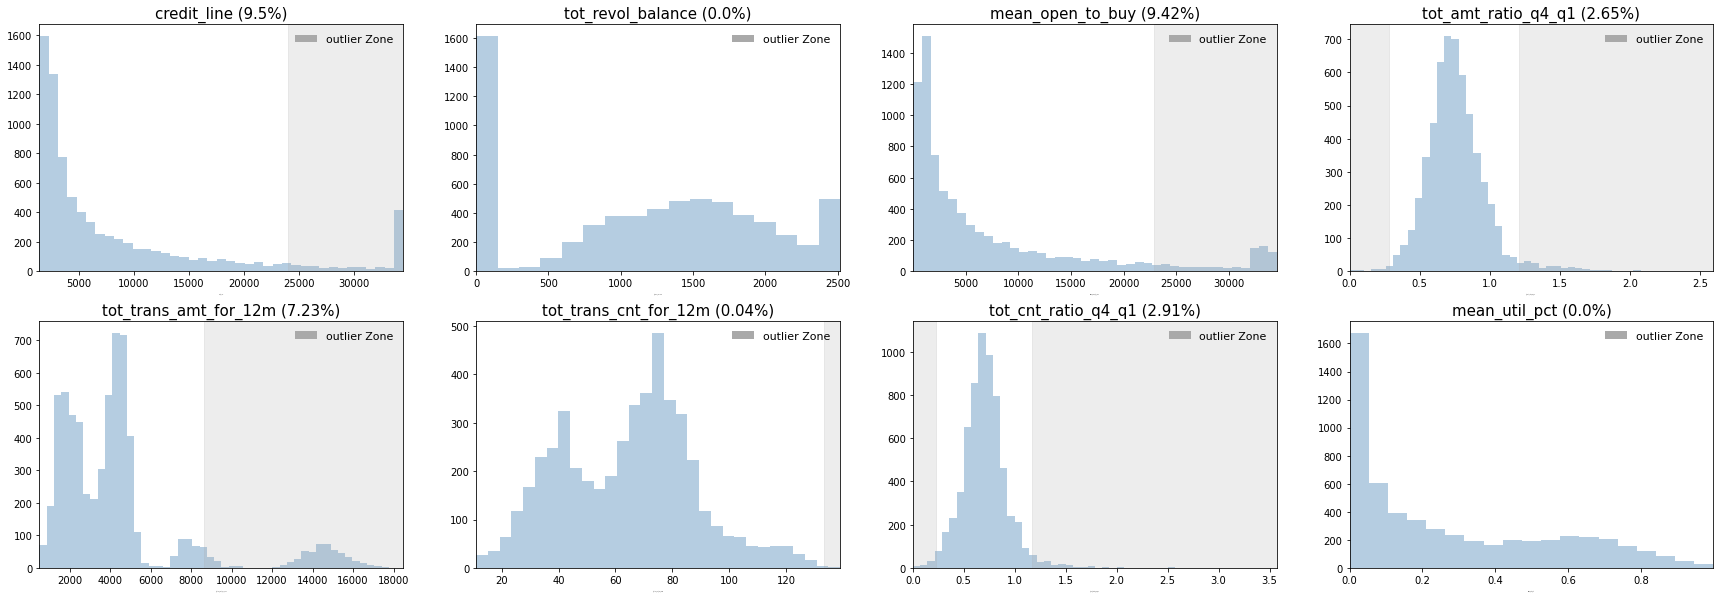

In [25]:
ColNames = df.select(pl.col(pl.Float64)).columns # 숫자형변수 (연속형)
cols  = 4  # 열

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(30,10))
for n, col in enumerate(ColNames):
    i = int(n/cols)  # row 위치
    j = int(n%cols)  # col 위치
    Graph3(df,col,i,j)

 &rightarrow; <span style='background-color:steelblue'><font color='white'> credit_line(카드한도), mean_open_to_buy(평균사용가능 신용한도), tot_amt_ratio_q4_q1(1분기 대비 4분기 거래금액 비율), tot_trans_amt_for_12m(최근 12개월동안 거래금액), tot_trans_cnt_for_12m(최근12개월동안 거래건수), tot_cnt_ratio_q4_q1(1분기 대비 4분기의 거래횟수 비율) 에 이상치가 존재한다.</font></span>  


&rightarrow;  credit_line, mean_open_to_buy, tot_trans_amt_for_12m 순서로 이상치가 많다. <U>(순서대로 이상치 비율 9.5%, 9.42%, 7.23%)</U>

# <span style="color:Midnightblue">**4. Preprocessing & Feature Engineering**</span>

## <span style="color:Midnightblue">**4-1. Train, Valid Split**</span>

In [26]:
train, valid = train_test_split(df,test_size=0.1,random_state=10)  # 데이터 많지 않기 때문에 test_size 0.1로 지정
train.shape, valid.shape     

((7290, 21), (811, 21))

<span style='background-color:steelblue'><font color='white'>&rightarrow; Valid : 모델 성능용</font></span>

## <span style="color:Midnightblue">**4-2. X, Y Split**</span>

In [27]:
def x_y_split(df):
    x = df.drop("cstno","is_churned")
    y = df[["is_churned"]]
    return x,y

In [28]:
# original data
X_train, y_train = x_y_split(train)
X_valid, y_valid = x_y_split(valid) 

## <span style="color:Midnightblue">**4-3. Missing Values**</span>

&rightarrow; 결측치 처리 방법을 비교한 후 <span style='background-color:steelblue'><font color='white'>최적의 방법을 선택</font></span>

In [29]:
def AucEvaluate(trainX,trainY,validX,validY):  
    xgb_clf = xgb.XGBClassifier(random_state=1234)
    lgb_clf = lgb.LGBMClassifier(random_state=1234) 
    
    # 문자형 변수 처리
    trainX = trainX.to_dummies(columns=trainX.select(pl.col(pl.Utf8)).columns) 
    validX = validX.to_dummies(columns=validX.select(pl.col(pl.Utf8)).columns)

    xgb_clf.fit(trainX,trainY) 
    score1 = roc_auc_score(xgb_clf.predict(validX),validY)
    lgb_clf.fit(trainX,trainY)
    score2 = roc_auc_score(lgb_clf.predict(validX),validY)
   #return max(score1,score2)
    return np.mean([score1,score2])

In [31]:
class missingImputer:
    def __init__(self,process):
        self.process = process     # 전처리 방법
        
    def fit(self,df,inputCols):
        self.df = df
        self.originalCols = df.columns  # 컬럼 저장
        self.inputCols    = inputCols
        
        if self.process == "KNN3":                       # 특정 변수들(selectCols)로부터 모델을 만들어서 결측값 예측
            self.imputer = KNNImputer(n_neighbors=3)
        elif self.process == "KNN5":
            self.imputer = KNNImputer(n_neighbors=5)
        elif self.process == "mean":
            self.imputer = SimpleImputer(strategy="mean")
        elif self.process == "iterativeImputer":         # estimator default : BayesianRidge 
            self.imputer = IterativeImputer(max_iter = 10, random_state = 1234)
        elif self.process == "linearRegression":         # 특정 변수들(selectCols)로부터 회귀분석을 진행해 결측값 예측
            self.imputer = IterativeImputer(estimator=LinearRegression(), verbose=0, max_iter=30, random_state = 1234)
        elif self.process == "decisionTreeRegressor":  
            self.imputer = IterativeImputer(estimator=DecisionTreeRegressor(), verbose=0, max_iter=30, random_state = 1234)
            
        fit = self.imputer.fit_transform(self.df[inputCols])
        train = pl.DataFrame(self.imputer.transform(self.df[inputCols]),
                             schema=inputCols)
        train = pl.concat([self.df.drop(inputCols),train],how='horizontal')[self.originalCols] # 원래 순서대로 정렬
        return train
    
    def transform(self,testdf):
        inputCols = self.inputCols
        imputer   = self.imputer
        originalCols = self.originalCols
        test = pl.DataFrame(self.imputer.transform(testdf[inputCols]),
                            schema=inputCols)
        test = pl.concat([testdf.drop(inputCols),test],how='horizontal')[originalCols] 
        return test

In [32]:
def Graph4(df,col,n):
    col0 = col[0]
    col1 = col[1] 
    sns.regplot(x=col0,y=col1,data=df,ax=ax[n])
   
    # 축,제목 지정
    ax[n].set_xlabel(col0,fontdict={'size':10}) 
    ax[n].set_ylabel(col1,fontdict={'size':10})

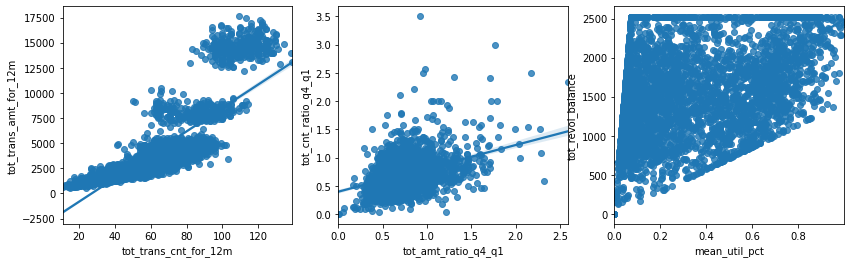

In [33]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(14,4))
ColNames=[("tot_trans_cnt_for_12m","tot_trans_amt_for_12m"),("tot_amt_ratio_q4_q1","tot_cnt_ratio_q4_q1"),("mean_util_pct","tot_revol_balance")]
for n, col in enumerate(ColNames):
    Graph4(df,col,n) 

&rightarrow; (from 1st chart) KNN imputer를 활용한 결측치 처리 방법 고민

- <span style="font-size:120%"><span style="color:Midnightblue">**KNN** (all columns)</span>

In [140]:
%%time
fillnull = missingImputer("KNN3") # 방법1 : knn (n=3), 모든 숫자형 변수를 활용해서 학습
cols = X_train.select(pl.col(pl.NUMERIC_DTYPES)).columns 
t = fillnull.fit(X_train, cols)
v = fillnull.transform(X_valid)
AucEvaluate(t,y_train,v,y_valid)

Wall time: 10.1 s


0.898810271769015

In [141]:
%%time
fillnull = missingImputer("KNN5") # 방법2 : knn (n=5), 모든 숫자형 변수를 활용해서 학습
cols = X_train.select(pl.col(pl.NUMERIC_DTYPES)).columns 
t = fillnull.fit(X_train, cols)
v = fillnull.transform(X_valid)
AucEvaluate(t,y_train,v,y_valid)

Wall time: 9.8 s


0.9242310020710229

- <span style="font-size:120%"><span style="color:red">**KNN** (some columns)</span>

In [27]:
%%time
# 방법3 : knn (n=5), 상관관계 높은 일부 변수 조합으로 학습
fillnull = missingImputer("KNN5") 
t = fillnull.fit(X_train,["tot_trans_cnt_for_12m","tot_trans_amt_for_12m"])
v = fillnull.transform(X_valid)

fillnull = missingImputer("KNN5") 
t1 = fillnull.fit(t,["tot_amt_ratio_q4_q1","tot_cnt_ratio_q4_q1"])
v1 = fillnull.transform(v)

fillnull = missingImputer("KNN5") 
t2 = fillnull.fit(t1,["mean_util_pct","tot_revol_balance"])
v2 = fillnull.transform(v1)
AucEvaluate(t2,y_train,v2,y_valid)  #0.9284

Wall time: 11.4 s


0.9284631228166251

- <span style="font-size:120%"><span style="color:red">**Mean**</span>

In [28]:
%%time
fillnull = missingImputer("mean") # 방법4 : 평균값
cols = X_train.select(pl.col(pl.NUMERIC_DTYPES)).columns 
t = fillnull.fit(X_train, cols)
v = fillnull.transform(X_valid)
AucEvaluate(t,y_train,v,y_valid)

Wall time: 789 ms


0.9338529667595492

- <span style="font-size:120%"><span style="color:Midnightblue">**Iterative Imputer** (all, some columns)</span>

In [144]:
%%time
fillnull = missingImputer("iterativeImputer") # 방법5 : IterativeImputer, 모든 숫자형 변수를 활용해서 학습
cols = X_train.select(pl.col(pl.NUMERIC_DTYPES)).columns 
t = fillnull.fit(X_train, cols)
v = fillnull.transform(X_valid)
AucEvaluate(t,y_train,v,y_valid)

Wall time: 1.58 s


0.9174014302497895

In [145]:
%%time
# 방법6 : IterativeImputer, 상관관계 높은 일부 변수 조합으로 학습
fillnull = missingImputer("iterativeImputer") 
t = fillnull.fit(X_train,["tot_trans_cnt_for_12m","tot_trans_amt_for_12m"])
v = fillnull.transform(X_valid)

fillnull = missingImputer("iterativeImputer") 
t1 = fillnull.fit(t,["tot_amt_ratio_q4_q1","tot_cnt_ratio_q4_q1"])
v1 = fillnull.transform(v)

fillnull = missingImputer("iterativeImputer") 
t2 = fillnull.fit(t1,["mean_util_pct","tot_revol_balance"])
v2 = fillnull.transform(v1)
AucEvaluate(t2,y_train,v2,y_valid)

Wall time: 765 ms


0.9248883981461145

- <span style="font-size:120%"><span style="color:Midnightblue">**Linear Regression** (all, some columns)</span>

In [146]:
%%time
fillnull = missingImputer("linearRegression") # 방법7 : linear regression by iterativeimputer, 모든 숫자형 변수를 활용해서 학습
cols = X_train.select(pl.col(pl.NUMERIC_DTYPES)).columns 
t = fillnull.fit(X_train, cols)
v = fillnull.transform(X_valid)
AucEvaluate(t,y_train,v,y_valid)

Wall time: 1.71 s


0.9055028966643698

In [147]:
%%time
# 방법8 : linear regression by iterativeimputer,  상관관계 높은 일부 변수 조합으로 학습
fillnull = missingImputer("linearRegression") 
t = fillnull.fit(X_train,["tot_trans_cnt_for_12m","tot_trans_amt_for_12m"])
v = fillnull.transform(X_valid)

fillnull = missingImputer("linearRegression") 
t1 = fillnull.fit(t,["tot_amt_ratio_q4_q1","tot_cnt_ratio_q4_q1"])
v1 = fillnull.transform(v)

fillnull = missingImputer("linearRegression") 
t2 = fillnull.fit(t1,["mean_util_pct","tot_revol_balance"])
v2 = fillnull.transform(v1)
AucEvaluate(t2,y_train,v2,y_valid)

Wall time: 732 ms


0.9254383805951102

- <span style="font-size:120%"><span style="color:Midnightblue">**DecisionTree Regression** (all, some columns)</span>

In [148]:
%%time
fillnull = missingImputer("decisionTreeRegressor")   # 방법9 : decisionTree Regressor by iterativeimputer, 모든 숫자형 변수를 활용해서 학습
cols = X_train.select(pl.col(pl.NUMERIC_DTYPES)).columns 
t = fillnull.fit(X_train, cols)
v = fillnull.transform(X_valid)
AucEvaluate(t,y_train,v,y_valid)

Wall time: 49.7 s


0.9185319673194139

In [149]:
%%time
# 방법10 : decisionTree regression by iterativeimputer,  상관관계 높은 일부 변수 조합으로 학습
fillnull = missingImputer("decisionTreeRegressor") 
t = fillnull.fit(X_train,["tot_trans_cnt_for_12m","tot_trans_amt_for_12m"])
v = fillnull.transform(X_valid)

fillnull = missingImputer("decisionTreeRegressor") 
t1 = fillnull.fit(t,["tot_amt_ratio_q4_q1","tot_cnt_ratio_q4_q1"])
v1 = fillnull.transform(v)

fillnull = missingImputer("decisionTreeRegressor") 
t2 = fillnull.fit(t1,["mean_util_pct","tot_revol_balance"])
v2 = fillnull.transform(v1)
AucEvaluate(t2,y_train,v2,y_valid)

Wall time: 1.33 s


0.9237464791134515

<span style='background-color:steelblue'><font color='white'>&rightarrow; KNN, Mean 성능 높게 나옴</font></span> (실제로 끝까지 돌렸을때 mean 보다 KNN이 높게 나옴, Mean 처리는 이탈 유무에 영향을 주는 변수의 특성을 담지 못한다고 생각), 전체 변수를 활용하는 것보다 <U>상관관계 높은 일부 변수들을 활용해서 결측치를 유추</U>하는게 성능이 더 높음

<span style='background-color:steelblue'><font color='white'>&rightarrow; 최종 결측치 처리방법 : KNN (방법3) 선택</font></span>

In [34]:
%%time
fillnull = missingImputer("KNN5")
t = fillnull.fit(X_train,["tot_trans_cnt_for_12m","tot_trans_amt_for_12m"])
v = fillnull.transform(X_valid)

fillnull = missingImputer("KNN5")
t1 = fillnull.fit(t,["tot_amt_ratio_q4_q1","tot_cnt_ratio_q4_q1"])
v1 = fillnull.transform(v)

fillnull = missingImputer("KNN5")
X_train = fillnull.fit(t1,["mean_util_pct","tot_revol_balance"])
X_valid = fillnull.transform(v1)

Wall time: 22.8 s


In [35]:
nullCnt(pl.concat([X_train,X_valid],how="vertical")) # 숫자형 변수 결측치 완료 

col,count,%
str,u32,f64
"""imcome_cat""",1619,20.0
"""sex""",808,10.0


* Relation : (mean_open_to_buy/credit_line) + mean_util_pct = 1    ( 한도내 평균적으로 사용가능한 금액(율) + 평균한도소진율(지출한금액) = 1 )

<span style='background-color:steelblue'> <font color='white'> &rightarrow; 해당 관계식 적용보다 KNN imputer 활용 시 auc 성능 개선됨 </font></span>  

In [13]:
#def Calculate(df):
#    df = df.with_columns(
#           pl.when(pl.col("mean_util_pct").is_null()).then((1-pl.col("mean_open_to_buy")/pl.col("credit_line")))
#             .otherwise(pl.col("mean_util_pct")).alias("mean_util_pct")
#         )
#    return df
#
#X_train, X_valid = map(Calculate,(X_train,X_valid))

## <span style="color:Midnightblue">**4-4. Encoding Categorical Variables**</span>

In [36]:
class CategoricalTransformer:        
    def fit(self,df):     
        self.df = df
        self.categoryCols = self.df.select(pl.col(pl.Utf8)).columns  #문자형 변수 저장 (hidden 데이터가 어떤 형태이든 저장된 형태와 동일하게 리턴)
        self.encoder = OneHotEncoder(sparse=False,handle_unknown = 'ignore') # one-hot encoding 
        
        encoder_df = pl.DataFrame(self.encoder.fit_transform(self.df[self.categoryCols])) # fit
        encoder_df.columns = [str(i)+"_"+str(j) for i, js in zip(self.categoryCols,self.encoder.categories_) for j in js]
        fit_df = pl.concat([self.df.drop(self.categoryCols),encoder_df],how="horizontal")
        return fit_df
    
    def transform(self,testdf): # X 로 들어오는 데이터에 대해서 onehotencoding 진행 (train 특성과 동일하게 리턴)
        encoder_df = pl.DataFrame(self.encoder.transform(testdf[self.categoryCols]))
        encoder_df.columns = [str(i)+"_"+str(j) for i, js in zip(self.categoryCols,self.encoder.categories_) for j in js]
        transform_df = pl.concat([testdf.drop(self.categoryCols),encoder_df],how="horizontal")
        return transform_df

In [37]:
%%time
encoding = CategoricalTransformer()  # label encoding 보다 onehotencoding 성능 높게 나옴
X_train = encoding.fit(X_train)
X_valid = encoding.transform(X_valid)

Wall time: 60 ms


&rightarrow; label encoding 보다 <span style='background-color:steelblue'><font color='white'> one-hot encoding 성능 높게 나옴</font></span>

## <span style="color:Midnightblue">**4-5. New Features**</span>

In [38]:
def Graph5(df,col,n):
    #KDE plot
    sns.distplot(df.filter(pl.col("is_churned")==0)[col], label="Exist", ax=ax[n], color='gray')  #hist=False 
    sns.distplot(df.filter(pl.col("is_churned")==1)[col], label="Churn", ax=ax[n])#, color="steelblue")
    
    # 범례 지정
    ax1_patch = mpatches.Patch(label='Exist',linewidth = 0, color='darkgray')
    ax2_patch = mpatches.Patch(label='Chrun',linewidth = 0)
    ax[n].legend(handles=[ax1_patch, ax2_patch], frameon=False, fontsize = 11, loc='upper left')
    
    # 축,제목 지정
    ax[n].set_xlabel(col,fontdict={'size':0}) # x축제목 안보이게 표현
    ax[n].set_title(col,fontsize=14)

In [39]:
def newFeatures(df): 
    #1. tot_product_count 4개 이상일때, 이탈율이 낮음 -> 하나로 묶어서 처리한다. 
    df = df.with_columns(pl.when(pl.col("tot_product_count")>=4).then(4)
                           .otherwise(pl.col("tot_product_count")).alias("tot_product_count"))
    
    #2. 은행거래기간 대비 활동기간 -> 유지고객일수록 크다.
    df = df.with_columns((12-pl.col("months_inact_for_12m")/(pl.col("mon_on_book"))).alias("actMonths"))
    
    #3. 평균한도소진율 X 카드한도 -> 지출금액
    df = df.with_columns((pl.col("mean_util_pct")*pl.col("credit_line")).alias("spentAmount")) 

    # 이외 변수 (성능 하락)
    # pl.col("tot_trans_cnt_for_12m")/(12-pl.col("months_inact_for_12m") : 12개월 거래기간 대비 거래 건수
    # pl.col("tot_trans_amt_for_12m")/(12-pl.col("months_inact_for_12m") : 12개월 거래기간 대비 거래 금액
    # pl.col("tot_product_count")/(12-pl.col("months_inact_for_12m")     : 12개월 거래기간 대비 현재 상품 갯수 
    # pl.col("tot_trans_cnt_for_12m")/pl.col("mon_on_book")              : 은행 거래기간 대비 거래건수 
    # pl.col("mon_on_book")/pl.col("age")*100                            : 연령 대비 은행 거래기간
    return df 

In [41]:
X_train, X_valid = map(newFeatures,(X_train,X_valid))

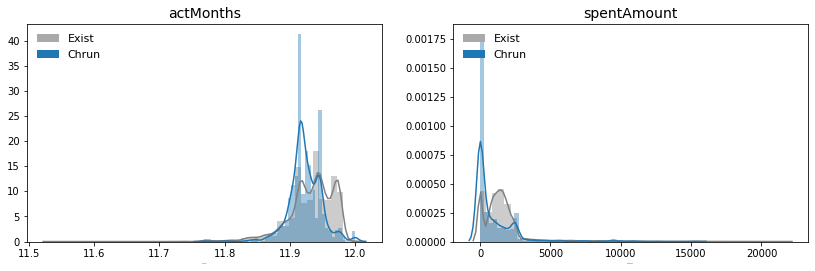

In [42]:
t = pl.concat([pl.concat([X_train,y_train],how='horizontal'),pl.concat([X_valid,y_valid],how='horizontal')],how='vertical')
ColNames = ['actMonths','spentAmount']
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14,4))
for n, col in enumerate(ColNames):
    Graph5(t,col,n)                                    

<span style='background-color:steelblue'><font color='white'>&rightarrow;  이탈,유지고객의 특성에 차이가 있음</font></span>   (기존 변수를 활용해 새로운 변수 생성함으로써 다중공선성 위험 있을 수 있음)

## <span style="color:Midnightblue">**4-6. Outlier**</span>

In [71]:
class OutlierRemover:  
    def __init__(self,traindf,cols):
        self.cols    = cols
        self.traindf = traindf
        self.saved_params = {}  # lower bound, upper bound 저장
    def fit(self):   
        for col in self.cols:
            q25 = np.quantile(self.traindf[col].drop_nulls(),0.25)
            q75 = np.quantile(self.traindf[col].drop_nulls(),0.75)   
            IQR = q75 - q25
            minimum, maximum = q25-(IQR*1.5), q75+(IQR*1.5)
            self.saved_params[col] = {'lower_bound': minimum,
                                      'upper_bound': maximum}
    def transform(self,testdf):
        for col in self.cols:
            lower_bound = self.saved_params[col]['lower_bound']
            upper_bound = self.saved_params[col]['upper_bound']
            testdf = testdf.with_columns(pl.when(pl.col(col)<=lower_bound).then(lower_bound)
                                           .otherwise(pl.col(col)).alias(col))
            testdf = testdf.with_columns(pl.when(pl.col(col)>=upper_bound).then(upper_bound)
                                           .otherwise(pl.col(col)).alias(col)) 
        return testdf

In [72]:
outlierCols = ["credit_line","mean_open_to_buy","tot_amt_ratio_q4_q1","tot_trans_amt_for_12m","tot_trans_cnt_for_12m","tot_cnt_ratio_q4_q1"]  # 이상치 제거 컬럼
remover = OutlierRemover(X_train,outlierCols)
remover.fit()
X_trainRm  = remover.transform(X_train)
X_validRm  = remover.transform(X_valid)

<span style='background-color:steelblue'><font color='white'>&rightarrow;  특정 임계값을 초과하면 이상치을 해당 임계값으로 대체한다.</font></span> (by Interquartile Range)

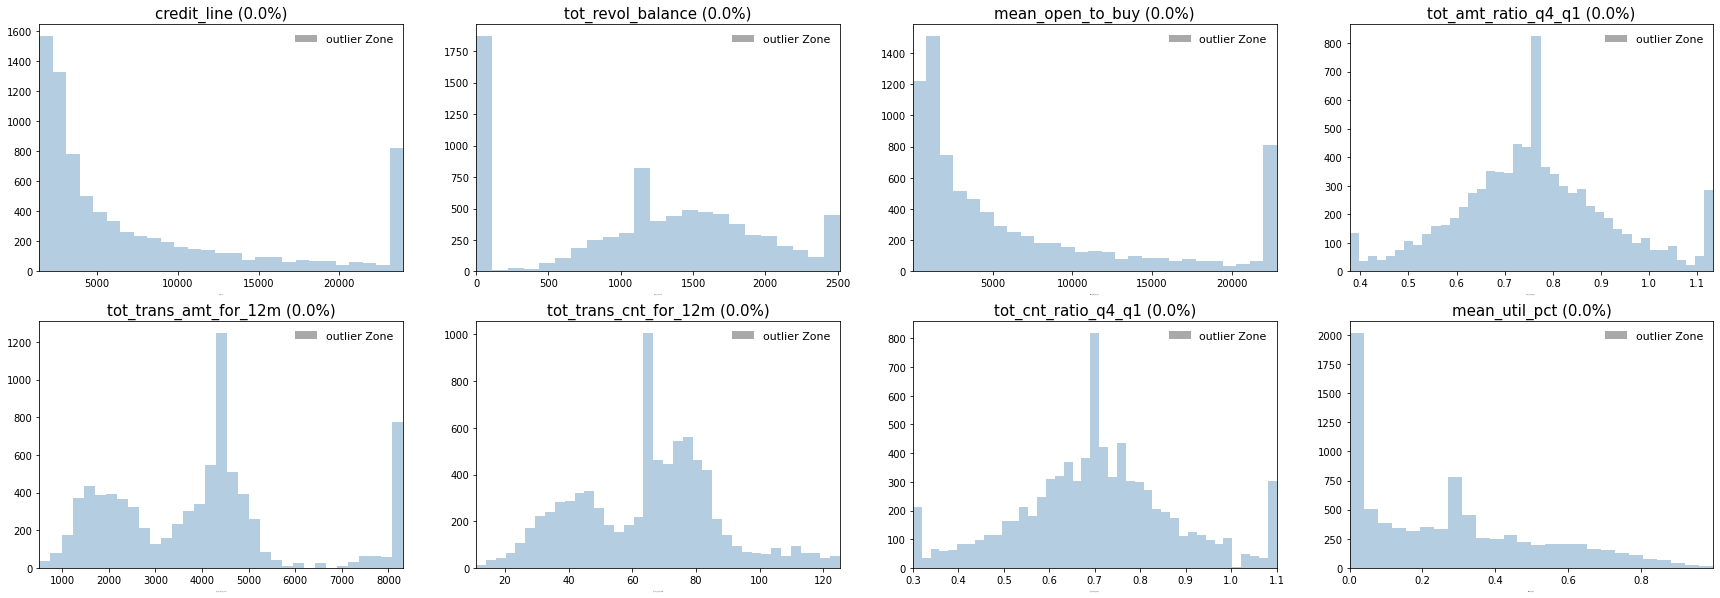

In [45]:
ColNames = df.select(pl.col(pl.Float64)).columns 
cols  = 4  # 열

fig, ax = plt.subplots(ncols=4, nrows=2, figsize=(30,10))
for n, col in enumerate(ColNames):
    i = int(n/cols)  # row 위치
    j = int(n%cols)  # col 위치
    Graph3(pl.concat([X_trainRm,X_validRm],how='vertical'),col,i,j)  

## <span style="color:Midnightblue">**4-7. Features Select (chi square & anova test)**</span>

In [46]:
def ChiSquareTest(col):
    contingencyTable = pd.crosstab(df[col],df['is_churned'])
    chi_squared_stat, p_value, dof, expected = chi2_contingency(contingencyTable)
    
    probability = 0.95
    alpha = 1-probability
    if p_value<=alpha:
        print(f"Reject H0,         There is a  Relationship between '{col}' and 'is_churned' variables")  # 귀무가설 기각 
    else:
        print(f"Fail to Reject H0, There is no Relationship between '{col}' and 'is_churned' variables")  # 귀무가설 채택 

In [47]:
# by chi square : 범주형 변수의 그룹 간 이탈 비율에 유의미한 차이가 있는지 확인
for col in ["sex","dependent_num","marital_stat","imcome_cat","education"]:
    ChiSquareTest(col)

Reject H0,         There is a  Relationship between 'sex' and 'is_churned' variables
Fail to Reject H0, There is no Relationship between 'dependent_num' and 'is_churned' variables
Fail to Reject H0, There is no Relationship between 'marital_stat' and 'is_churned' variables
Reject H0,         There is a  Relationship between 'imcome_cat' and 'is_churned' variables
Reject H0,         There is a  Relationship between 'education' and 'is_churned' variables


<span style='background-color:steelblue'><font color='white'>&rightarrow; dependent_num(부양가족수), marital_stat(결혼상태)에 대해서 귀무가설 채택  (해당 변수는 그룹 간 이탈 비율에 유의미한 차이가 없다)</font></span>

In [48]:
def AnovaTest(col):
    churn = df.filter(pl.col("is_churned")==1)[[col]].drop_nulls()
    exist = df.filter(pl.col("is_churned")==0)[[col]].drop_nulls()
    f_value, p_value = stats.f_oneway(churn, exist)

    probability = 0.95
    alpha = 1-probability
    if p_value<=alpha:
        print(f"Reject H0,         There is a  difference in means between '{col}' and 'is_churned' variables")  # 귀무가설 기각 
    else:
        print(f"Fail to Reject H0, There is no difference in means between '{col}' and 'is_churned' variables")  # 귀무가설 채택 (평균에 통계적으로 유의미한 차이가 없다)

In [49]:
for col in df.select(pl.col(pl.Float64)).columns:
    AnovaTest(col)

Reject H0,         There is a  difference in means between 'credit_line' and 'is_churned' variables
Reject H0,         There is a  difference in means between 'tot_revol_balance' and 'is_churned' variables
Fail to Reject H0, There is no difference in means between 'mean_open_to_buy' and 'is_churned' variables
Reject H0,         There is a  difference in means between 'tot_amt_ratio_q4_q1' and 'is_churned' variables
Reject H0,         There is a  difference in means between 'tot_trans_amt_for_12m' and 'is_churned' variables
Reject H0,         There is a  difference in means between 'tot_trans_cnt_for_12m' and 'is_churned' variables
Reject H0,         There is a  difference in means between 'tot_cnt_ratio_q4_q1' and 'is_churned' variables
Reject H0,         There is a  difference in means between 'mean_util_pct' and 'is_churned' variables


<span style='background-color:steelblue'><font color='white'>&rightarrow; mean_open_to_buy(평균 사용가능 신용한도)에 대해서 귀무가설 채택  (해당 변수는 churn=yes, churn=no사이의 평균에 유의미한 차이가 없다)</font></span>

In [50]:
# Features Select(chi square & anova test)
X_trainCs = X_train.drop([col for col in X_train.columns if "dependent_num" in col or "marital_stat" in col or "mean_open_to_buy" in col])
X_validCs = X_valid.drop([col for col in X_train.columns if "dependent_num" in col or "marital_stat" in col or "mean_open_to_buy" in col])

## <span style="color:Midnightblue">**4-9. Normalization & PCA**</span>

In [51]:
scaler = StandardScaler()  # 정규화 이후 pca
X_trainSc = pl.DataFrame(scaler.fit_transform(X_train),schema=X_train.columns)
X_validSc = pl.DataFrame(scaler.transform(X_valid),schema=X_valid.columns)

In [52]:
pca = PCA(n_components=21)
X_trainPc = pl.DataFrame(pca.fit_transform(X_trainSc))
X_validPc = pl.DataFrame(pca.transform(X_validSc))

In [53]:
sum(pca.explained_variance_ratio_) # pca 변수로 설명 가능 분산량 (79%)

0.7968288572973784

# <span style="color:Midnightblue">**5. Modeling**</span>

## <span style="color:Midnightblue">**5-1. OverSampling**</span>

- <span style="font-size:120%"><span style="color:Midnightblue">**OverSampling** (only)</span>

In [54]:
def oversampling(X,y):
    smote = SMOTE(sampling_strategy='auto', random_state=1234)
    X,y = smote.fit_resample(np.array(X),np.array(y)) 
    return X,y

In [74]:
X_trainOs, y_trainOs = oversampling(X_train,y_train)   # oversampling only with original train data 
X_trainCO, y_trainCO = oversampling(X_trainCs,y_train) # oversampling only with feature select(chi square& anova test) train data
X_trainSO, y_trainSO = oversampling(X_trainSc,y_train) # oversampling only with normalization train data
X_trainPO, y_trainPO = oversampling(X_trainPc,y_train) # oversampling only with Pca train data
X_trainRO, y_trainRO = oversampling(X_trainRm,y_train) # oversampling only with Outlier handling train data

- <span style="font-size:120%"><span style="color:Midnightblue">**OverSampling & UnderSampling** (both)</span>

In [75]:
def bothSampling(X,y):
    over  = BorderlineSMOTE(sampling_strategy=0.3 ,random_state=125)
    under = RandomUnderSampler(sampling_strategy=0.6, random_state=125)  
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    X,y = pipeline.fit_resample(np.array(X),np.array(y))
    return X,y

In [76]:
X_trainBs, y_trainBs = bothSampling(X_train,y_train)   # bothsampling with original train data
X_trainFB, y_trainFB = bothSampling(X_trainCs,y_train) # bothsampling with feature select(chi square& anova test) train data
X_trainSB, y_trainSB = oversampling(X_trainSc,y_train) # bothsampling with normalization train data
X_trainPB, y_trainPB = bothSampling(X_trainPc,y_train) # bothsampling with Pca train data
X_trainRB, y_trainRB = oversampling(X_trainRm,y_train) # bothsampling only with Outlier handling train data

In [59]:
def Graph4(n,y):
    # count 
    if type(y)!=np.ndarray: Cnt = Counter(y.to_series())
    else:                   Cnt = Counter(y)
    # pie chart
    ax[n].pie([Cnt[0],Cnt[1]],autopct='%1.1f%%',labels=["Exist","Churn"],colors=["gray","steelblue"],startangle=90)

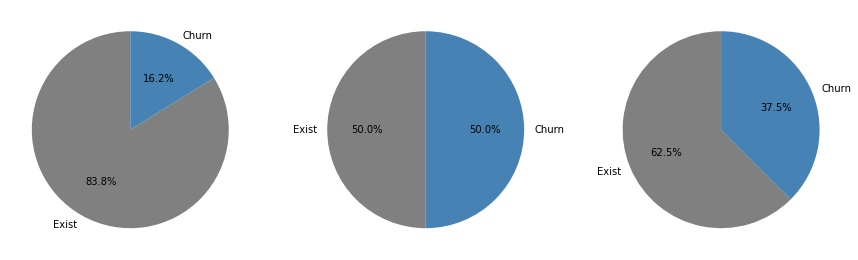

In [60]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(15,5))
for n,i in enumerate([y_train,y_trainOs,y_trainBs]):  #original, oversampling only, over&undersampling
    Graph4(n,i)

## <span style="color:Midnightblue">**5-2. Modeling, Evaluate**</span>

&rightarrow; 데이터 많지 않아서, 시작할때 지정한 valid의 auc 이외에도, <span style='background-color:steelblue'><font color='white'>cross validation</font></span>을 통해 한번 더 auc를 측정함으로서 최적의 모델 채택 예정

In [77]:
# model fit (set early stopping options)
def fitSE(trainX,trainY,validX,validY,model):  
    model.fit(trainX, trainY,
              eval_metric='auc',
              eval_set=[(trainX,trainY),(validX,validY)],
              early_stopping_rounds=50,   #n_estimators 만큼 반복하는데, early_stopping_rounds만큼 성능향상이 없으면 조기중단
              verbose=False) 
    
# model fit (not set early stopping options)
def fitNE(trainX,trainY,model): 
    model.fit(trainX,trainY)


# 교차검증 실시 (train데이터를 train/valid로 나눠서 auc 측정 -> 과적합 방지 및 최적의 모델 선택하기 위함)
def cvScore(trainX,trainY,model,default="simple"):  
    folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1234)  
    aucs  = []
    for trn_idx, val_idx in folds.split(trainX, trainY):
        train_X = trainX[trn_idx]
        train_Y = trainY[trn_idx]
    
        cross_X = trainX[val_idx]
        cross_Y = trainY[val_idx]
        
        if default!="earlyStopping": model.fit(train_X,train_Y)
        else:                        model.fit(train_X,train_Y,eval_metric='auc',eval_set=[(train_X,train_Y),(cross_X,cross_Y)],
                                               early_stopping_rounds=50, verbose=False)   # earlystopping 옵션 추가시 작동
        predY = model.predict(cross_X)
        auc   = roc_auc_score(cross_Y,predY)
        aucs.append(auc)
    return np.mean(aucs)


# auc print
def printAuc(auc1,auc2):
    print(f"auc(cv) : {auc1:,.5f},  auc(valid) : {auc2:,.5f}".format(auc1,auc2))

- <span style="font-size:120%"><span style="color:Midnightblue">**xgboost** (original data)</span>

In [62]:
xgb = XGBClassifier(n_estimators=50000,learning_rate=0.05,reg_alpha=0.001,max_depth=5,min_child_weight=5,colsample_bytree=0.5)  
auc_cv = cvScore(X_train,y_train,xgb,"earlyStopping")   # train 데이터 활용해서 cross validation 진행

fitSE(X_train,y_train,X_valid,y_valid,xgb)              # fit (early stopping 작동)
auc_valid = roc_auc_score(y_valid,xgb.predict(X_valid)) # predict 및 auc 측정
printAuc(auc_cv,auc_valid)  # 0.89916

auc(cv) : 0.87024,  auc(valid) : 0.89916


- <span style="font-size:120%"><span style="color:Midnightblue">**xgboost** (original data with over sampling only)</span>

In [52]:
xgbOS =XGBClassifier(n_estimators=50000,learning_rate=0.05,reg_alpha=0.001,max_depth=5,min_child_weight=5,colsample_bytree=0.5)  
auc_cv = cvScore(X_trainOs,y_trainOs,xgbOS,"earlyStopping")

fitSE(X_trainOs,y_trainOs,X_valid,y_valid,xgbOS)
auc_valid = roc_auc_score(y_valid,xgbOS.predict(X_valid))
printAuc(auc_cv,auc_valid)  # 0.91837

auc(cv) : 0.96915,  auc(valid) : 0.91837


<span style='background-color:steelblue'><font color='white'>&rightarrow; with SMOTE (oversampling)</font></span>을 통해 <U><font color='red'>AUC 향상, 과적합 발생</font></U>

- <span style="font-size:120%"><span style="color:Midnightblue">**xgboost** (original data with over,under sampling)</span>

In [63]:
#xgbBS = XGBClassifier(n_estimators=50000,learning_rate=0.05,reg_alpha=0.001,max_depth=7)   # 0.93230
xgbBS = XGBClassifier(n_estimators=50000,learning_rate=0.05,reg_alpha=0.001,max_depth=5,min_child_weight=5,colsample_bytree=0.5) 
auc_cv = cvScore(X_trainBs,y_trainBs,xgbBS,"earlyStopping")

fitSE(X_trainBs,y_trainBs,X_valid,y_valid,xgbBS)
auc_valid = roc_auc_score(y_valid,xgbBS.predict(X_valid))
printAuc(auc_cv,auc_valid)  # 0.93375

auc(cv) : 0.93099,  auc(valid) : 0.93375


<span style='background-color:steelblue'><font color='white'>&rightarrow; with SMOTE & RandomUnderSampler (over,undersampling)</font></span>을 통해 <U><font color='red'>AUC 대폭 향상 및 과적합 개선</font></U>

- <span style="font-size:120%"><span style="color:Midnightblue">**xgboost** (feature select data with over,under sampling)</span>

In [32]:
xgbFB = XGBClassifier(n_estimators=50000,learning_rate=0.05,reg_alpha=0.001,max_depth=5,min_child_weight=5,colsample_bytree=0.5) 
auc_cv = cvScore(X_trainFB,y_trainFB,xgbFB,"earlyStopping")

fitSE(X_trainFB,y_trainFB,X_validCs,y_valid,xgbFB)
auc_valid = roc_auc_score(y_valid,xgbFB.predict(X_validCs))
printAuc(auc_cv,auc_valid)   # 0.93933

auc(cv) : 0.92919,  auc(valid) : 0.93933


<span style='background-color:steelblue'><font color='white'>&rightarrow; with Feature select(chi square)</font></span> <U>효과 미미함</U>

- <span style="font-size:120%"><span style="color:Midnightblue">**xgboost** (normalization data with over,under sampling)</span>

In [64]:
xgbSB = XGBClassifier(n_estimators=50000,learning_rate=0.05,reg_alpha=0.001,max_depth=5,min_child_weight=5,colsample_bytree=0.5) 
auc_cv = cvScore(X_trainSB,y_trainSB,xgbSB,"earlyStopping")

fitSE(X_trainSB,y_trainSB,X_validSc,y_valid,xgbSB)
auc_valid = roc_auc_score(y_valid,xgbSB.predict(X_validSc))
printAuc(auc_cv,auc_valid)  # 0.91620

auc(cv) : 0.96760,  auc(valid) : 0.91620


<span style='background-color:steelblue'><font color='white'>&rightarrow; with Normalization</font></span> <U>성능 떨어지고 과적합 발생</U>

- <span style="font-size:120%"><span style="color:Midnightblue">**xgboost** (pca data with over,under sampling)</span>

In [78]:
xgbFB = XGBClassifier(n_estimators=50000,learning_rate=0.05,reg_alpha=0.001,max_depth=5,min_child_weight=5,colsample_bytree=0.5) 
auc_cv = cvScore(X_trainPB,y_trainPB,xgbFB,"earlyStopping")

fitSE(X_trainPB,y_trainPB,X_validPc,y_valid,xgbFB)
auc_valid = roc_auc_score(y_valid,xgbFB.predict(X_validPc))
printAuc(auc_cv,auc_valid)   # 0.79826

auc(cv) : 0.84130,  auc(valid) : 0.79826


<span style='background-color:steelblue'><font color='white'>&rightarrow; with Pca</font></span> <U>성능 매우 떨어짐</U>

- <span style="font-size:120%"><span style="color:Midnightblue">**xgboost** (Outlier handling data with over,under sampling)</span>

In [82]:
xgbRB = XGBClassifier(n_estimators=50000,learning_rate=0.05,reg_alpha=0.001,max_depth=5,min_child_weight=5,colsample_bytree=0.5) 
auc_cv = cvScore(X_trainRB,y_trainRB,xgbRB,"earlyStopping")

fitSE(X_trainRB,y_trainRB,X_validRm,y_valid,xgbFB)
auc_valid = roc_auc_score(y_valid,xgbRB.predict(X_validRm))
printAuc(auc_cv,auc_valid)   

auc(cv) : 0.96899,  auc(valid) : 0.91910


<span style='background-color:steelblue'><font color='white'>&rightarrow; with Outlier handling data with over, under sampling</font></span> <U>성능 떨어짐</U>

- <span style="font-size:120%"><span style="color:red">**lightgbm** (original data with over,under sampling)</span>

In [83]:
#lgbmBS = LGBMClassifier(n_estimators=50000,learning_rate=0.05,reg_alpha=0.001,num_leaves=31) 
lgbmBS  = LGBMClassifier(n_estimators=50000,learning_rate=0.05,reg_alpha=0.001)  # reg_alpha 없을때보다 있을떄 더 높다.
auc_cv = cvScore(X_trainBs,y_trainBs,lgbmBS,"earlyStopping")

fitSE(X_trainBs,y_trainBs,X_valid,y_valid,lgbmBS)
auc_valid = roc_auc_score(y_valid,lgbmBS.predict(X_valid))
printAuc(auc_cv,auc_valid)  # 0.94687

auc(cv) : 0.93034,  auc(valid) : 0.94687


<U><span style='background-color:steelblue'><font color='white'>&rightarrow; 해당 모델의 auc(valid) 가장 높고 과적합의 이슈도 없기때문에 해당 모델 선택 </font></span> </U>  (better than xgboost)

- <span style="font-size:120%"><span style="color:Midnightblue">**lightgbm** (feature select data with over,under sampling)</span>

In [35]:
lgbmFB = LGBMClassifier(n_estimators=50000,learning_rate=0.05,reg_alpha=0.001) 
auc_cv = cvScore(X_trainFB,y_trainFB,lgbmFB,"earlyStopping")

fitSE(X_trainFB,y_trainFB,X_validCs,y_valid,lgbmFB)
auc_valid = roc_auc_score(y_valid,lgbmFB.predict(X_validCs))
printAuc(auc_cv,auc_valid)  # 0.93788

auc(cv) : 0.93328,  auc(valid) : 0.93788


<span style='background-color:steelblue'><font color='white'>&rightarrow; with Feature select(chi square)</font></span> <U>성능 떨어짐</U>

- <span style="font-size:120%"><span style="color:Midnightblue">**lightgbm** (normalization data with over,under sampling)</span>

In [84]:
lgbmSB = LGBMClassifier(n_estimators=50000,learning_rate=0.05,reg_alpha=0.001)
auc_cv = cvScore(X_trainSB,y_trainSB,lgbmSB,"earlyStopping")

fitSE(X_trainSB,y_trainSB,X_validSc,y_valid,lgbmSB)
auc_valid = roc_auc_score(y_valid,lgbmSB.predict(X_validSc))
printAuc(auc_cv,auc_valid)  # 0.93469 

auc(cv) : 0.96997,  auc(valid) : 0.92860


<span style='background-color:steelblue'><font color='white'>&rightarrow; with Normalization</font></span> <U>성능 떨어지고 과적합 발생</U>

- <span style="font-size:120%"><span style="color:Midnightblue">**lightgbm** (Outlier handling data with over,under sampling)</span>

In [85]:
lgbmSB = LGBMClassifier(n_estimators=50000,learning_rate=0.05,reg_alpha=0.001)
auc_cv = cvScore(X_trainRB,y_trainRB,lgbmSB,"earlyStopping")

fitSE(X_trainRB,y_trainRB,X_validRm,y_valid,lgbmSB)
auc_valid = roc_auc_score(y_valid,lgbmSB.predict(X_validRm))
printAuc(auc_cv,auc_valid)   

auc(cv) : 0.97194,  auc(valid) : 0.91134


<span style='background-color:steelblue'><font color='white'>&rightarrow; with Outlier handling data</font></span> <U>성능 떨어지고 과적합 발생</U>

&rightarrow; <U>original data with over,under sampling</U> 으로 다른 모델링 진행

- <span style="font-size:120%"><span style="color:Midnightblue">**random forest** (original data with over,under sampling)</span>

In [75]:
rfBS = RandomForestClassifier(n_estimators=1000,random_state=123,max_depth=8,max_features=6,min_samples_leaf=1,min_samples_split=3)
auc_cv = cvScore(X_trainBs,y_trainBs,rfBS)

fitNE(X_trainBs,y_trainBs,rfBS)
auc_valid = roc_auc_score(y_valid,rfBS.predict(X_valid))
printAuc(auc_cv,auc_valid)  # 성능이 훨씬 낮다. 

auc(cv) : 0.89078,  auc(valid) : 0.87640


- <span style="font-size:120%"><span style="color:Midnightblue">**decision tree** (original data with over,under sampling)</span>

In [76]:
dtBS = DecisionTreeClassifier(random_state=123,max_depth=8,min_samples_leaf=9,min_samples_split=6)
auc_cv = cvScore(X_trainBs,y_trainBs,dtBS)

fitNE(X_trainBs,y_trainBs,dtBS)
auc_valid = roc_auc_score(y_valid,dtBS.predict(X_valid))
printAuc(auc_cv,auc_valid)  # 성능이 훨씬 낮다. 

auc(cv) : 0.85429,  auc(valid) : 0.86489


- <span style="font-size:120%"><span style="color:Midnightblue">**ada boost** (original data with over,under sampling)</span>

In [77]:
adaBS = AdaBoostClassifier(n_estimators=1000,learning_rate=0.01,algorithm='SAMME',random_state=123)
auc_cv = cvScore(X_trainBs,y_trainBs,adaBS)

fitNE(X_trainBs,y_trainBs,adaBS)
auc_valid = roc_auc_score(y_valid,adaBS.predict(X_valid))
printAuc(auc_cv,auc_valid)  # 성능이 훨씬 낮다. 

auc(cv) : 0.82635,  auc(valid) : 0.82233


- <span style="font-size:120%"><span style="color:Midnightblue">**gradient Boosting** (original data with over,under sampling)</span>

In [78]:
gbBS = GradientBoostingClassifier(n_estimators=1000,random_state=123,max_depth=25,min_samples_split=2,min_samples_leaf=15)
auc_cv = cvScore(X_trainBs,y_trainBs,gbBS)

fitNE(X_trainBs,y_trainBs,gbBS)
auc_valid = roc_auc_score(y_valid,gbBS.predict(X_valid))
printAuc(auc_cv,auc_valid)   # 0.90823

auc(cv) : 0.93202,  auc(valid) : 0.90823


- <span style="font-size:120%"><span style="color:Midnightblue">**voting** (original data with over,under sampling)</span>

In [81]:
xgbVoting = XGBClassifier(n_estimators=400, max_depth=5, min_child_weight=5, gamma=0.1,learning_rate=0.05) 
lgbVoting = LGBMClassifier(n_estimators=400,learning_rate=0.05) 
knnVoting = KNeighborsClassifier(n_neighbors=5)
Voting    = VotingClassifier(estimators=[("XGB",xgbVoting),("LGB",lgbVoting),("KNN",knnVoting)],voting='soft')
auc_cv = cvScore(X_trainBs,y_trainBs,Voting)

fitNE(X_trainBs,y_trainBs,Voting)
auc_valid = roc_auc_score(y_valid,Voting.predict(X_valid))
printAuc(auc_cv,auc_valid) #  0.92961

auc(cv) : 0.93361,  auc(valid) : 0.91918


In [100]:
xgbVoting = XGBClassifier(n_estimators=400,  min_child_weight=5, gamma=0.1,learning_rate=0.05) 
lgbVoting = LGBMClassifier(n_estimators=400,learning_rate=0.05,reg_lambda=0.01) 
knnVoting = KNeighborsClassifier(n_neighbors=5)
Voting    = VotingClassifier(estimators=[("XGB",xgbVoting),("LGB",lgbVoting),("KNN",knnVoting)],voting='hard')
auc_cv = cvScore(X_trainBs,y_trainBs,Voting)

fitNE(X_trainBs,y_trainBs,Voting)
auc_valid = roc_auc_score(y_valid,Voting.predict(X_valid))
printAuc(auc_cv,auc_valid)   # 0.93520  (앙상블 모형은 편향될 위험이 있다)

auc(cv) : 0.93258,  auc(valid) : 0.91628


- <span style="font-size:120%"><span style="color:Midnightblue">**Bagging** (original data with over,under sampling)</span>

In [ ]:
#Bagging = BaggingClassifier(base_estimator=LGBMClassifier(n_estimators=400,learning_rate=0.01),  
#                            n_estimators=100,
#                            n_jobs=-1,
#                            max_samples=0.5,
#                            max_features=0.5,
#                            random_state=1)
#auc_cv = cvScore(X_trainBs,y_trainBs,Bagging)
#
#fitNE(X_trainBs,y_trainBs,Bagging)
#auc_valid = roc_auc_score(y_valid,Bagging.predict(X_valid))
#printAuc(auc_cv,auc_valid)   #  

## <span style="color:Midnightblue">**5-3. Model Tuning**</span>

&rightarrow; 위에선 직접 파라미터 조정함. 최적의 모델(lightgbm)에 대해서 <span style='background-color:steelblue'><font color='white'> hyper parameter tunning</font></span>을 통해 최적의 파라미터 채택 예정

In [67]:
params = {
    'learning_rate' : np.arange(0.01,0.1,0.02),
    'num_leaves'    : [20,50,100,300],
    'max_depth'     : [5,25,50,75],  
    'reg_alpha'     : [0.001,0.005,0.1,0.5]
}

In [68]:
%%time
lgbm   = LGBMClassifier(random_state=0,n_jobs=-1)
lgbmGV = GridSearchCV(lgbm,params,cv=3,scoring='roc_auc',n_jobs=1,verbose=0)  # verbose=0 (no print), verbose=1 (simple message print) 
lgbmGV.fit(X_trainBs,y_trainBs)

Wall time: 12min 33s


GridSearchCV(cv=3, estimator=LGBMClassifier(random_state=0), n_jobs=1,
             param_grid={'learning_rate': array([0.01, 0.03, 0.05, 0.07, 0.09]),
                         'max_depth': [5, 25, 50, 75],
                         'num_leaves': [20, 50, 100, 300],
                         'reg_alpha': [0.001, 0.005, 0.1, 0.5]},
             scoring='roc_auc')

In [69]:
lgbmGV.best_params_ # 최적 파라미터

{'learning_rate': 0.08999999999999998,
 'max_depth': 50,
 'num_leaves': 50,
 'reg_alpha': 0.005}

In [73]:
roc_auc_score(y_valid,lgbmGV.predict(X_valid))

0.9371541501976285

<span style='background-color:steelblue'><font color='white'>&rightarrow; with GridSearchCV</font></span> <U>효과 미미함 </U>

## <span style="color:Midnightblue">**5-4. Features Select (feature importance)**</span>

In [155]:
permuter = PermutationImportance(lgbmBS,scoring="roc_auc",random_state=1234).fit(X_trainBs, y_trainBs)
tmp = pl.DataFrame([X_train.columns,permuter.feature_importances_],
                    schema=['col','feature_importances']).sort("feature_importances",descending=True)
eli5.show_weights(permuter, top = 20, feature_names = X_train.columns)

Weight,Feature
0.1040 ± 0.0082,tot_trans_cnt_for_12m
0.0249 ± 0.0012,tot_trans_amt_for_12m
0.0104 ± 0.0019,tot_product_count
0.0020 ± 0.0003,tot_revol_balance
0.0018 ± 0.0004,actMonths
0.0016 ± 0.0004,tot_amt_ratio_q4_q1
0.0015 ± 0.0007,tot_cnt_ratio_q4_q1
0.0012 ± 0.0002,contact_cnt_for_12m
0.0004 ± 0.0001,age
0.0002 ± 0.0001,mean_open_to_buy


<span style='background-color:steelblue'><font color='white'> &rightarrow; 모델 중요변수 해석 </font></span>

tot_trans_cnt_for_12m (최근 12개월 동안의 거래 건수) : 거래 건수가 적을수록 이탈 가능성이 높음

tot_trans_amt_for_12m (최근 12개월 동안의 거래 금액) : 거래 금액이 적을수록 이탈 가능성이 높음

tot_product_count (현재 보유 상품 개수) : 현재 보유 상품이 적을수록 이탈 가능성이 높음 


- <span style="font-size:120%"><span style="color:Midnightblue">**importance >= 0.001** </span>

In [106]:
FsCols1 = list(tmp.filter(pl.col("feature_importances")>=0.001)['col'])
X_trainFs = pl.DataFrame(X_trainBs,schema=X_train.columns).select(FsCols1)
X_validFs = X_valid.select(FsCols1)

In [107]:
lgbmFS1 = LGBMClassifier(n_estimators=50000,learning_rate=0.05,reg_alpha=0.001) 
auc_cv = cvScore(X_trainFs,y_trainBs,lgbmFS1,"earlyStopping")

fitSE(X_trainFs,y_trainBs,X_validFs,y_valid,lgbmFS1)
auc_valid = roc_auc_score(y_valid,lgbmFS1.predict(X_validFs))
printAuc(auc_cv,auc_valid)   #0.92867

auc(cv) : 0.92783,  auc(valid) : 0.93570


- <span style="font-size:120%"><span style="color:Midnightblue">**importance >= 0.0001** </span>

In [102]:
FsCols2 = list(tmp.filter(pl.col("feature_importances")>=0.0001)['col'])
X_trainFs = pl.DataFrame(X_trainBs,schema=X_train.columns).select(FsCols2)
X_validFs = X_valid.select(FsCols2)

In [103]:
lgbmFS2 = LGBMClassifier(n_estimators=50000,learning_rate=0.05,reg_alpha=0.001) 
auc_cv = cvScore(X_trainFs,y_trainBs,lgbmFS2,"earlyStopping")

fitSE(X_trainFs,y_trainBs,X_validFs,y_valid,lgbmFS2)
auc_valid = roc_auc_score(y_valid,lgbmFS2.predict(X_validFs))
printAuc(auc_cv,auc_valid)   # 0.93643 -> 0.93157

auc(cv) : 0.93306,  auc(valid) : 0.94056


- <span style="font-size:120%"><span style="color:Midnightblue">**importance > 0** </span>

In [99]:
FsCols3 = list(tmp.filter(pl.col("feature_importances")>0)['col'])
X_trainFs = pl.DataFrame(X_trainBs,schema=X_train.columns).select(FsCols3)
X_validFs = X_valid.select(FsCols3)

In [100]:
lgbmFS3 = LGBMClassifier(n_estimators=50000,learning_rate=0.05,reg_alpha=0.001) 
auc_cv  = cvScore(X_trainFs,y_trainBs,lgbmFS3,"earlyStopping")

fitSE(X_trainFs,y_trainBs,X_validFs,y_valid,lgbmFS3)
auc_valid = roc_auc_score(y_valid,lgbmFS3.predict(X_validFs))
printAuc(auc_cv,auc_valid)   # 0.94397 -> 0.93230

auc(cv) : 0.93443,  auc(valid) : 0.93157


&rightarrow; <span style='background-color:steelblue'><font color='white'>with Feature select(feature importance)</font></span> <U>효과 미미함</U>

<font color='red'>&rightarrow;  <U>**최종적으로 lightgbm (original data with over,under sampling) 모델 선택**</U></font> 

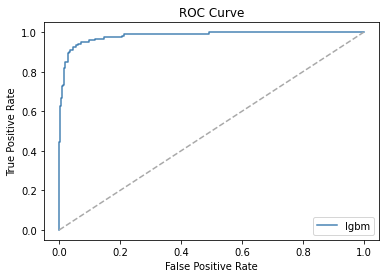

In [188]:
auc_valid = roc_auc_score(y_valid,lgbmBS.predict(X_valid))
fpr,tpr,thresholds = roc_curve(y_valid,lgbmBS.predict_proba(X_valid)[:,1])
plt.figure()
plt.title('ROC Curve')
plt.plot(fpr,tpr,color='steelblue',label='lgbm')
plt.plot([0,1],[0,1],color='darkgray',linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()

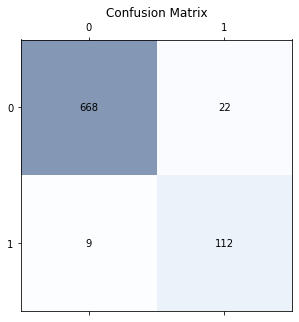

In [153]:
matrix = confusion_matrix(y_valid,lgbmBS.predict(X_valid))
fig, ax = plt.subplots(figsize=(5,5))
plt.title('Confusion Matrix')
ax.matshow(matrix,cmap=plt.cm.Blues,alpha=0.5)
# text
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        ax.text(x=j,y=i,s=matrix[i,j],va='center',ha='center')
plt.show()

&rightarrow; 유지고객(target=0)을 올바르게 예측 (predict=0) : 668명

   유지고객 (target=0) 을 틀리게 예측 (predict=1) : 22명

   이탈고객 (target=1) 을 틀리게 예측 (predict=0) : 9명

<font color='red'> <U> 이탈고객 (target=1) 을 올바르게 예측 (predict=1) : 112명</U> </font>   (이탈 고객군을 정확하게 그리고 최대한 많이 예측하는 게 중요)

# <span style="color:Midnightblue">**6. Conclusion**</span>


## <span style="color:Midnightblue">**6-1. 한계점 및 결론**</span>

- 파라미터 튜닝 및 최적의 변수 조합 선정에 있어서 조금 부족했던 것 같고 이상치 처리에 대해 좀 더 고민이 필요해보였습니다.

- 당행데이터를 활용해 모델을 만들어보았고, 이를 더 적용해 활동고객 이탈에 영향을 미치는 요인을 분석해보고, 이탈가능성이 높은 고객을 사전에 파악하는데 활용해보도록 하겠습니다. (당행 데이터 활용은 요약보고서에 기술했습니다)

## <span style="color:Midnightblue">**6-2. test transform**</span>

- <span style="font-size:120%"><span style="color:Midnightblue">**function (최종 모델에 적용되는 함수만 추가)** </span>

In [4]:
def x_y_split(df):
    x = df.drop("cstno","is_churned")
    y = df[["is_churned"]]
    return x,y

class missingImputer:
    def __init__(self,process):
        self.process = process     # 전처리 방법
        
    def fit(self,df,inputCols):
        self.df = df
        self.originalCols = df.columns  # 컬럼 저장
        self.inputCols    = inputCols
        
        if self.process == "KNN3":                       # 특정 변수들(selectCols)로부터 모델을 만들어서 결측값 예측
            self.imputer = KNNImputer(n_neighbors=3)
        elif self.process == "KNN5":
            self.imputer = KNNImputer(n_neighbors=5)
        elif self.process == "mean":
            self.imputer = SimpleImputer(strategy="mean")
        elif self.process == "iterativeImputer":         # estimator default : BayesianRidge 
            self.imputer = IterativeImputer(max_iter = 10, random_state = 1234)
        elif self.process == "linearRegression":         # 특정 변수들(selectCols)로부터 회귀분석을 진행해 결측값 예측
            self.imputer = IterativeImputer(estimator=LinearRegression(), verbose=0, max_iter=30, random_state = 1234)
        elif self.process == "decisionTreeRegressor":  
            self.imputer = IterativeImputer(estimator=DecisionTreeRegressor(), verbose=0, max_iter=30, random_state = 1234)
            
        fit = self.imputer.fit_transform(self.df[inputCols])
        train = pl.DataFrame(self.imputer.transform(self.df[inputCols]),
                             schema=inputCols)
        train = pl.concat([self.df.drop(inputCols),train],how='horizontal')[self.originalCols] # 원래 순서대로 정렬
        return train
    
    def transform(self,testdf):
        inputCols = self.inputCols
        imputer   = self.imputer
        originalCols = self.originalCols
        test = pl.DataFrame(self.imputer.transform(testdf[inputCols]),
                            schema=inputCols)
        test = pl.concat([testdf.drop(inputCols),test],how='horizontal')[originalCols] 
        return test
    
class CategoricalTransformer:        
    def fit(self,df):     
        self.df = df
        self.categoryCols = self.df.select(pl.col(pl.Utf8)).columns  #문자형 변수 저장 (hidden 데이터가 어떤 형태이든 저장된 형태와 동일하게 리턴)
        self.encoder = OneHotEncoder(sparse=False,handle_unknown = 'ignore') # one-hot encoding 
        
        encoder_df = pl.DataFrame(self.encoder.fit_transform(self.df[self.categoryCols])) # fit
        encoder_df.columns = [str(i)+"_"+str(j) for i, js in zip(self.categoryCols,self.encoder.categories_) for j in js]
        fit_df = pl.concat([self.df.drop(self.categoryCols),encoder_df],how="horizontal")
        return fit_df
    
    def transform(self,testdf): # X 로 들어오는 데이터에 대해서 onehotencoding 진행 (train 특성과 동일하게 리턴)
        encoder_df = pl.DataFrame(self.encoder.transform(testdf[self.categoryCols]))
        encoder_df.columns = [str(i)+"_"+str(j) for i, js in zip(self.categoryCols,self.encoder.categories_) for j in js]
        transform_df = pl.concat([testdf.drop(self.categoryCols),encoder_df],how="horizontal")
        return transform_df
        
def newFeatures(df): 
    #1. tot_product_count 4개 이상일때, 이탈율이 낮음 -> 하나로 묶어서 처리한다. 
    df = df.with_columns(pl.when(pl.col("tot_product_count")>=4).then(4)
                           .otherwise(pl.col("tot_product_count")).alias("tot_product_count"))
    
    #2. 은행거래기간 대비 활동기간 -> 유지고객일수록 크다.
    df = df.with_columns((12-pl.col("months_inact_for_12m")/(pl.col("mon_on_book"))).alias("actMonths"))
    
    #3. 평균한도소진율 X 카드한도 -> 지출금액
    df = df.with_columns((pl.col("mean_util_pct")*pl.col("credit_line")).alias("spentAmount")) 

    # 이외 변수 (성능 하락)
    # pl.col("tot_trans_cnt_for_12m")/(12-pl.col("months_inact_for_12m") : 12개월 거래기간 대비 거래 건수
    # pl.col("tot_trans_amt_for_12m")/(12-pl.col("months_inact_for_12m") : 12개월 거래기간 대비 거래 금액
    # pl.col("tot_product_count")/(12-pl.col("months_inact_for_12m")     : 12개월 거래기간 대비 현재 상품 갯수 
    # pl.col("tot_trans_cnt_for_12m")/pl.col("mon_on_book")              : 은행 거래기간 대비 거래건수 
    # pl.col("mon_on_book")/pl.col("age")*100                            : 연령 대비 은행 거래기간
    return df

def bothSampling(X,y):
    over  = BorderlineSMOTE(sampling_strategy=0.3 ,random_state=125)
    under = RandomUnderSampler(sampling_strategy=0.6, random_state=125)  
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    X,y = pipeline.fit_resample(np.array(X),np.array(y))
    return X,y


def fitSE(trainX,trainY,validX,validY,model):  
    model.fit(trainX, trainY,
              eval_metric='auc',
              eval_set=[(trainX,trainY),(validX,validY)],
              early_stopping_rounds=50,   #n_estimators 만큼 반복하는데, early_stopping_rounds만큼 성능향상이 없으면 조기중단
              verbose=False) 

- <span style="font-size:120%"><span style="color:Midnightblue">**train data fit (선행작업)** </span>

In [5]:
%%time
df = pl.from_pandas(pd.read_csv("bank_churner.csv"))

# train/ valid split, x/y split
train, valid = train_test_split(df,test_size=0.1,random_state=10)  
X_train, y_train = x_y_split(train)
X_valid, y_valid = x_y_split(valid) 

# missing 
fillnull = missingImputer("KNN5")
t = fillnull.fit(X_train,["tot_trans_cnt_for_12m","tot_trans_amt_for_12m"])
v = fillnull.transform(X_valid)
fillnull = missingImputer("KNN5")
t1 = fillnull.fit(t,["tot_amt_ratio_q4_q1","tot_cnt_ratio_q4_q1"])
v1 = fillnull.transform(v)
fillnull = missingImputer("KNN5")
X_train = fillnull.fit(t1,["mean_util_pct","tot_revol_balance"])
X_valid = fillnull.transform(v1)

# one-hot-encoding
encoding = CategoricalTransformer()  # label encoding 보다 onehotencoding 성능 높게 나옴
X_train = encoding.fit(X_train)
X_valid = encoding.transform(X_valid)

# new-features
X_train, X_valid = map(newFeatures,(X_train,X_valid))

# over sampling & under sampling
X_trainBs, y_trainBs = bothSampling(X_train,y_train)   # bothsampling with original train data

# model fit 
lgbmBS  = LGBMClassifier(n_estimators=50000,learning_rate=0.05,reg_alpha=0.001)  # reg_alpha 없을때보다 있을떄 더 높다.
fitSE(X_trainBs,y_trainBs,X_valid,y_valid,lgbmBS)

Wall time: 25.6 s


- <span style="font-size:120%"><span style="color:Midnightblue">**test transform** </span>

In [6]:
def test_transform(x_test):
    # x,y split -> already split
    x_test = x_test.drop("cstno")  # "is_churned"
    
    # no missing
    
    # one-hot-encoding
    x_test = encoding.transform(x_test)
    
    # new_features
    x_test = newFeatures(x_test)
    return x_test

In [ ]:
x_test = test_transform(x_test)
roc_auc_score(test_y,lgbmBS.predict(x_test))